## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import mode


In [2]:
df= pd.read_csv('fetal.csv')

In [3]:
# Checking for duplicate records
df.duplicated().sum()

13

In [4]:
df = df.drop_duplicates(keep=False)

In [5]:

df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,...,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000
mean,133.294957,0.003196,0.009545,0.004404,0.001911,0.000003,0.000160,46.970980,1.337821,9.733587,...,93.558516,164.154139,4.083254,0.327307,137.440057,134.574691,138.073264,18.992388,0.316365,1.303045
std,9.835514,0.003877,0.046922,0.002937,0.002970,0.000058,0.000593,17.176094,0.885249,18.269947,...,29.551706,17.950353,2.954069,0.709228,16.423998,15.626467,14.493064,29.090512,0.611105,0.613958
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,8.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### EDA

In [6]:
# Create seperate list of categorical and numerical variables
categorical_features = df.select_dtypes(include='object').columns.to_list()
numerical_features = df.select_dtypes(include='number').columns.to_list()

In [7]:
numerical_features.remove('fetal_health')
numerical_features

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [8]:
categorical_features

[]

In [9]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [76]:
df.shape

(2102, 23)

In [10]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [11]:
for col in categorical_features:
    print(col,": {} Number of Unique categories ".format(df[col].nunique()))
    print(df[col].unique())
    print("="*75)

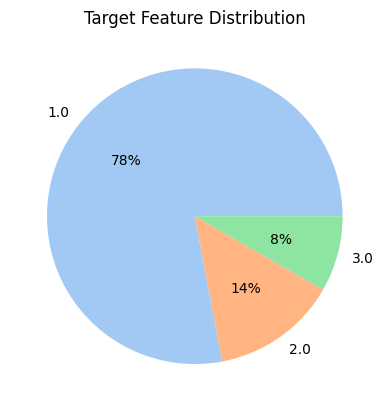

In [12]:
# Target variable distribution
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['fetal_health'].value_counts(), labels = df['fetal_health'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title('Target Feature Distribution')
plt.show()

In [13]:
# Lets explore distribution of categories in features.
def categorical_analysis(dataframe:pd.DataFrame(),cat_features:list,
                         rows:int,columns:int,target_feature:pd.Series()= None,fig_width: int = 20, fig_height: int = 10):
    
    plt.figure(figsize=(fig_width,fig_height))
    for i,col in enumerate(cat_features):
        plt.subplot(rows,columns,i+1)
        sns.countplot(data=dataframe,x=col,hue=target_feature)
        plt.title("{} Distribution".format(col))
    plt.show()

In [14]:
categorical_analysis(df,categorical_features,2,3)

<Figure size 2000x1000 with 0 Axes>

### convert datatypes by doing label encoding

In [15]:
LE = LabelEncoder()

### Outlier Handling

In [16]:
X = df.copy()
y = X.pop('fetal_health')

#### before

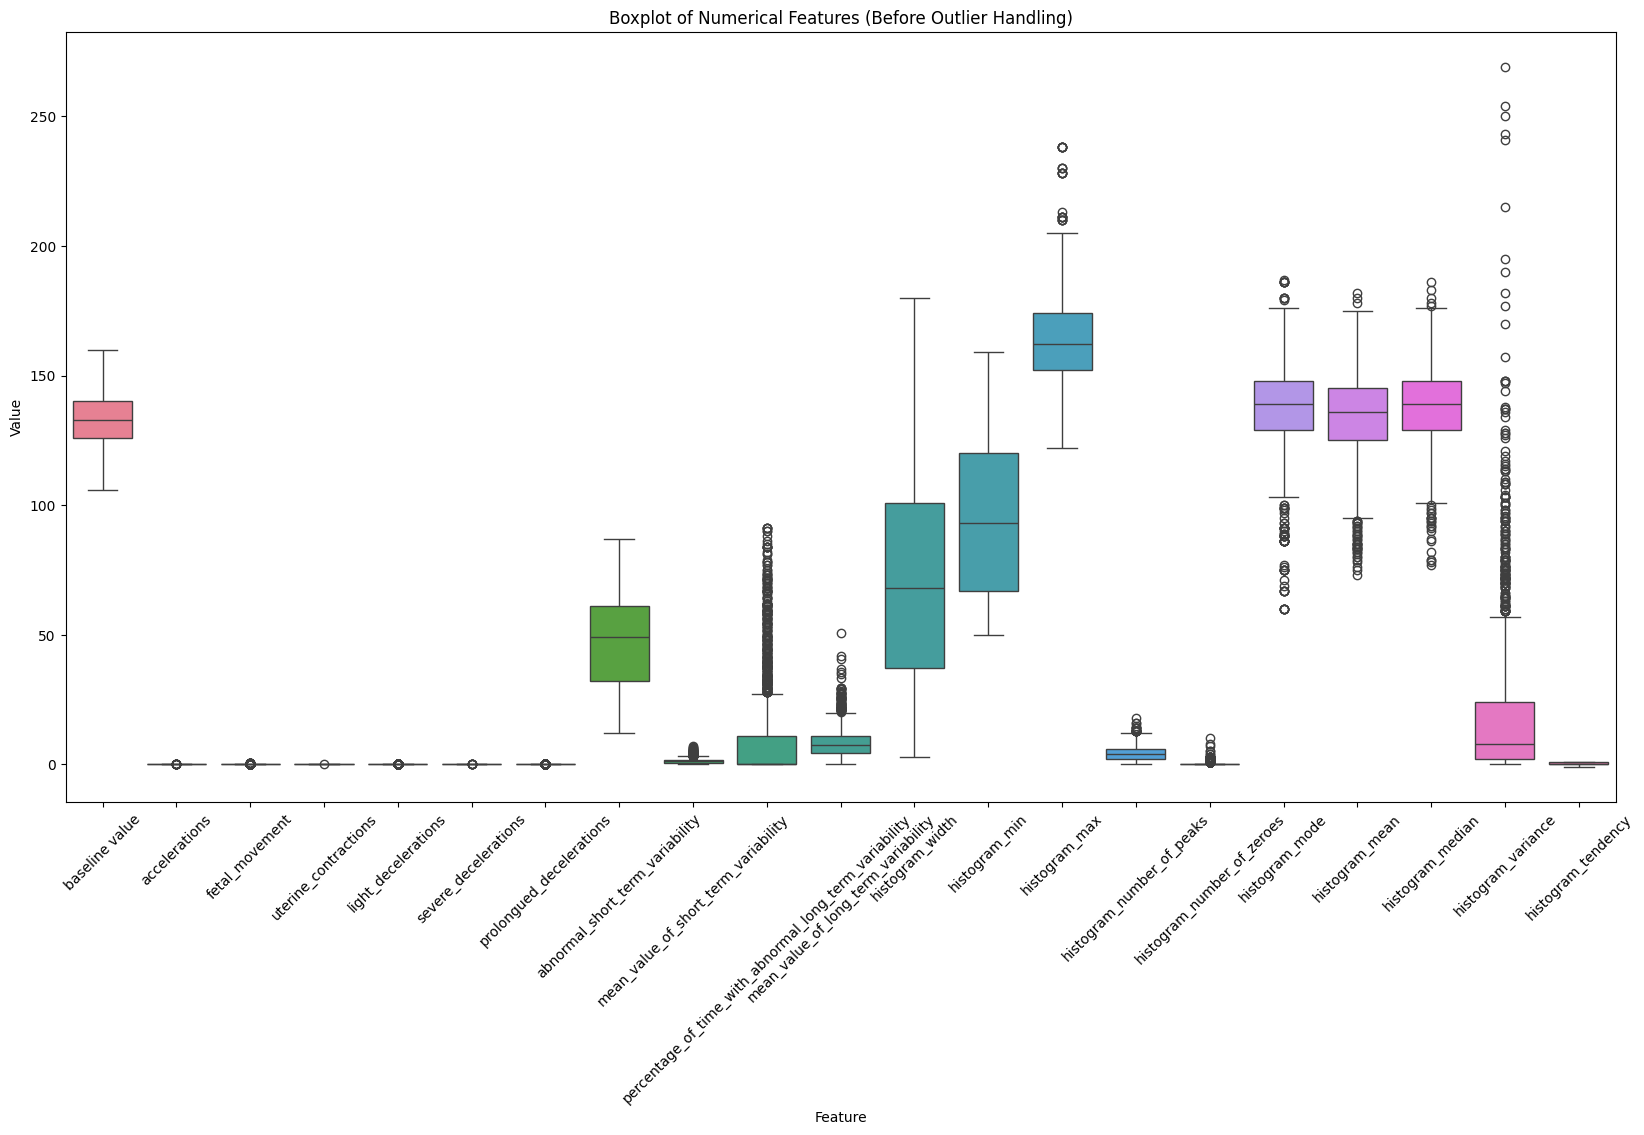

In [17]:
# Create a boxplot for numerical features before handling outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=X[numerical_features])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Numerical Features (Before Outlier Handling)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


In [18]:
X = df.copy()
for i in numerical_features:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    median = X[i].median()
    out1 = X[(X[i]<lower_extreme)].values
    out2 = X[X[i]>upper_extreme].values
    X[i].replace(out1, median, inplace=True)
    X[i].replace(out2,median,inplace=True)

#### after

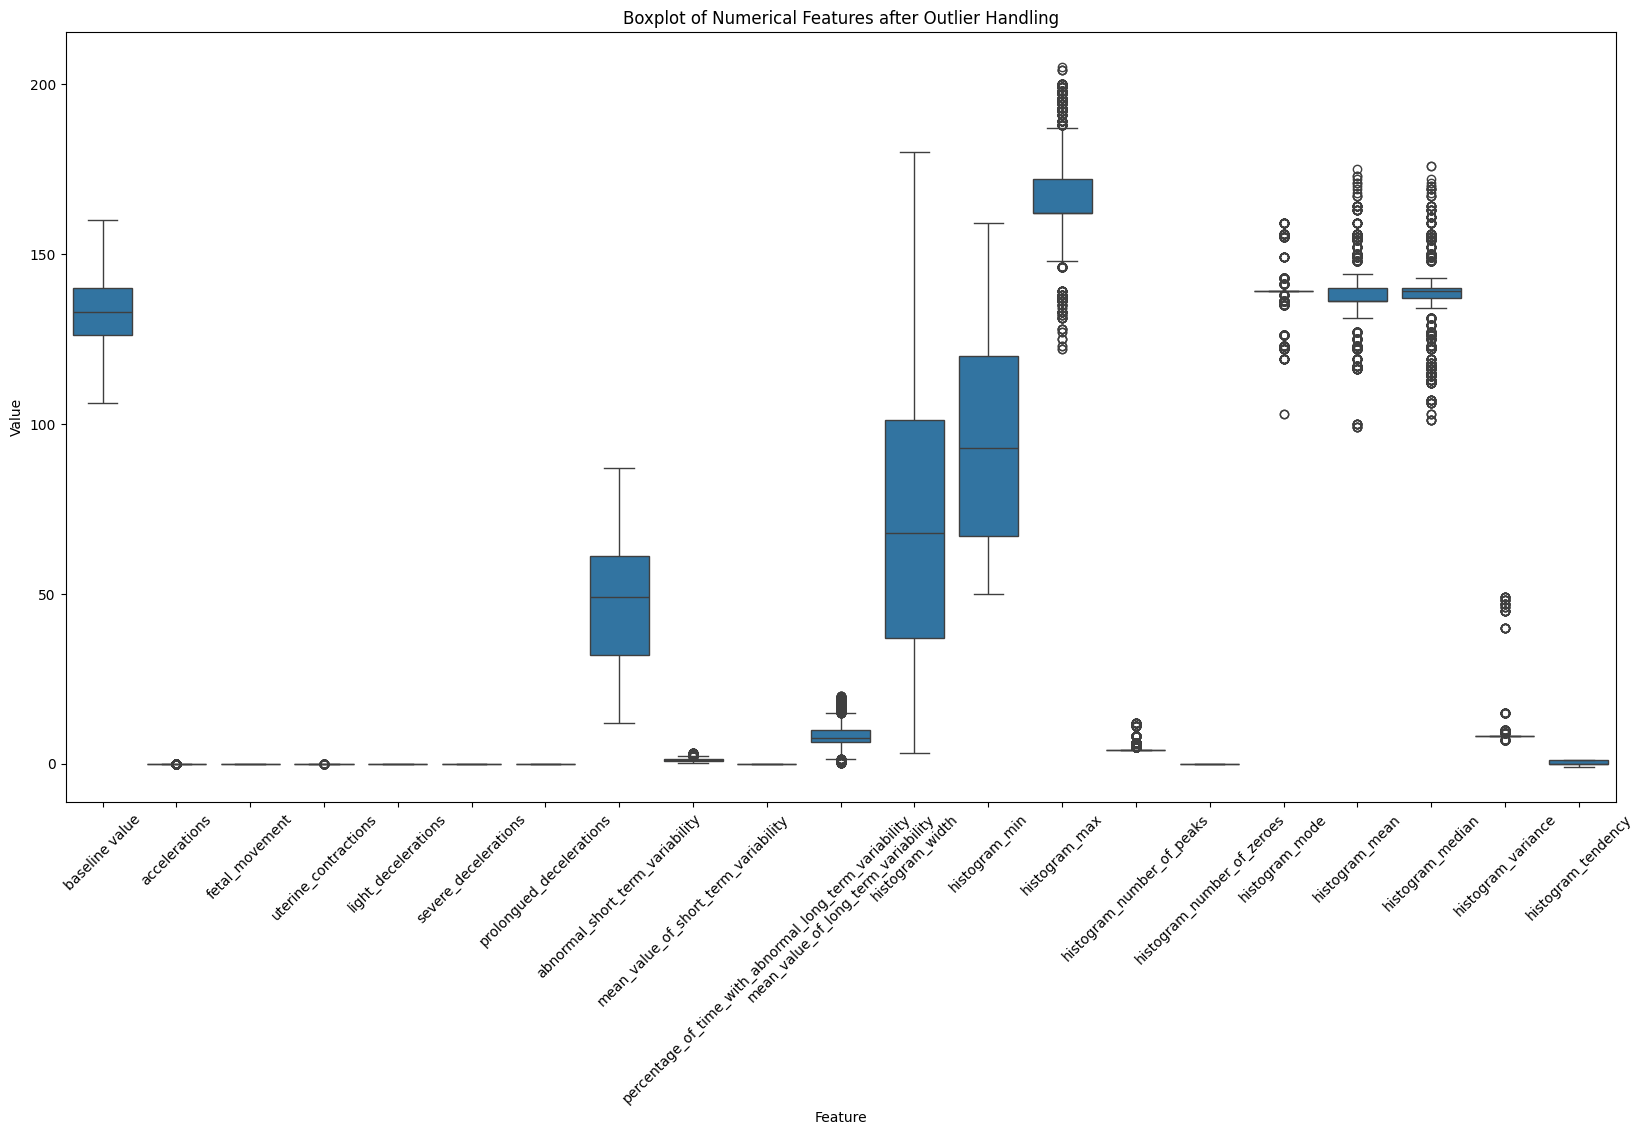

In [19]:
# Melt the dataframe to have all numerical features in one column
melted_df = pd.melt(X[numerical_features])

# Create a boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=melted_df, x='variable', y='value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Numerical Features after Outlier Handling')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


# Feature Engineering

## standardization

In [20]:
scaler = preprocessing.StandardScaler()
X_new = scaler.fit_transform(X)
X_new

array([[-1.35205148, -0.50352871,  0.        , ..., -0.16209374,
         1.11895223,  1.1354539 ],
       [-0.1316927 ,  0.81701695,  0.        , ..., -0.16209374,
        -0.51781714, -0.4937093 ],
       [-0.02999613, -0.17339229,  0.        , ..., -0.16209374,
        -0.51781714, -0.4937093 ],
       ...,
       [ 0.68187982, -0.50352871,  0.        , ..., -0.16209374,
         1.11895223,  1.1354539 ],
       [ 0.68187982, -0.50352871,  0.        , ..., -0.16209374,
         1.11895223,  1.1354539 ],
       [ 0.88527296, -0.50352871,  0.        , ..., -0.16209374,
        -0.51781714, -0.4937093 ]])

In [21]:

X_scaled = pd.DataFrame(X_new, columns=X.columns)
X_scaled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.352051,-0.503529,0.0,-0.047571,0.0,0.0,0.0,1.515782,-1.311836,0.0,...,-1.068163,-0.287116,-0.430485,0.0,0.087193,-0.047136,0.086892,-0.162094,1.118952,1.135454
1,-0.131693,0.817017,0.0,0.404888,0.0,0.0,0.0,-1.745339,1.533309,0.0,...,-0.865080,2.232498,0.938471,0.0,0.449049,-0.160500,0.182971,-0.162094,-0.517817,-0.493709
2,-0.029996,-0.173392,0.0,1.309804,0.0,0.0,0.0,-1.803574,1.533309,0.0,...,-0.865080,2.232498,0.253993,0.0,0.449049,-0.273864,-0.009187,-0.162094,-0.517817,-0.493709
3,0.071700,-0.173392,0.0,1.309804,0.0,0.0,0.0,-1.803574,2.066774,0.0,...,-1.372786,0.272798,4.360861,0.0,0.087193,-0.387227,-0.105267,-0.162094,1.118952,-0.493709
4,-0.131693,-0.503529,0.0,1.309804,0.0,0.0,0.0,-1.803574,2.066774,0.0,...,-1.372786,0.272798,-0.430485,0.0,0.087193,-0.160500,-0.009187,-0.162094,1.118952,-0.493709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.681880,-0.503529,0.0,0.857346,0.0,0.0,0.0,1.865188,-1.845301,0.0,...,1.470366,0.762723,-0.430485,0.0,0.087193,1.426593,1.335921,-0.162094,-0.517817,1.135454
2098,0.681880,-0.503529,0.0,0.857346,0.0,0.0,0.0,1.806954,-0.067085,0.0,...,0.319566,0.202809,0.938471,0.0,0.087193,1.199866,0.086892,-0.162094,1.118952,1.135454
2099,0.681880,-0.503529,0.0,0.857346,0.0,0.0,0.0,1.865188,-0.067085,0.0,...,0.319566,0.272798,0.253993,0.0,0.087193,1.199866,1.335921,-0.162094,1.118952,1.135454
2100,0.681880,-0.503529,0.0,0.404888,0.0,0.0,0.0,1.806954,-0.067085,0.0,...,0.319566,0.202809,0.938471,0.0,0.087193,-0.160500,0.086892,-0.162094,1.118952,1.135454


### Normalization

In [22]:
scale = MinMaxScaler()
X_new1 = scale.fit_transform(X)

In [23]:
X_new1

array([[0.25925926, 0.        , 0.        , ..., 0.02380952, 1.        ,
        0.5       ],
       [0.48148148, 0.30769231, 0.        , ..., 0.02380952, 0.5       ,
        0.        ],
       [0.5       , 0.07692308, 0.        , ..., 0.02380952, 0.5       ,
        0.        ],
       ...,
       [0.62962963, 0.        , 0.        , ..., 0.02380952, 1.        ,
        0.5       ],
       [0.62962963, 0.        , 0.        , ..., 0.02380952, 1.        ,
        0.5       ],
       [0.66666667, 0.        , 0.        , ..., 0.02380952, 0.5       ,
        0.        ]])

In [24]:
X_scaled = pd.DataFrame(X_new1, columns=X.columns)
X_scaled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.259259,0.000000,0.0,0.307692,0.0,0.0,0.0,0.813333,0.100000,0.0,...,0.110092,0.481928,0.000,0.0,0.642857,0.500000,0.506667,0.02381,1.0,0.5
1,0.481481,0.307692,0.0,0.384615,0.0,0.0,0.0,0.066667,0.633333,0.0,...,0.165138,0.915663,0.250,0.0,0.678571,0.486842,0.520000,0.02381,0.5,0.0
2,0.500000,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.633333,0.0,...,0.165138,0.915663,0.125,0.0,0.678571,0.473684,0.493333,0.02381,0.5,0.0
3,0.518519,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,0.0,...,0.027523,0.578313,0.875,0.0,0.642857,0.460526,0.480000,0.02381,1.0,0.0
4,0.481481,0.000000,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,0.0,...,0.027523,0.578313,0.000,0.0,0.642857,0.486842,0.493333,0.02381,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.629630,0.000000,0.0,0.461538,0.0,0.0,0.0,0.893333,0.000000,0.0,...,0.798165,0.662651,0.000,0.0,0.642857,0.671053,0.680000,0.02381,0.5,0.5
2098,0.629630,0.000000,0.0,0.461538,0.0,0.0,0.0,0.880000,0.333333,0.0,...,0.486239,0.566265,0.250,0.0,0.642857,0.644737,0.506667,0.02381,1.0,0.5
2099,0.629630,0.000000,0.0,0.461538,0.0,0.0,0.0,0.893333,0.333333,0.0,...,0.486239,0.578313,0.125,0.0,0.642857,0.644737,0.680000,0.02381,1.0,0.5
2100,0.629630,0.000000,0.0,0.384615,0.0,0.0,0.0,0.880000,0.333333,0.0,...,0.486239,0.566265,0.250,0.0,0.642857,0.486842,0.506667,0.02381,1.0,0.5


In [25]:
X_scaled.to_csv('Normalized_fetal.csv')

In [26]:
df = pd.read_csv('Normalized_fetal.csv')


In [27]:
df1= pd.read_csv('Normalized_fetal.csv')
df1.head()

,Unnamed: 0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0,0.259259,0.000000,0.0,0.307692,0.0,0.0,0.0,0.813333,0.100000,...,0.110092,0.481928,0.000,0.0,0.642857,0.500000,0.506667,0.02381,1.0,0.5
1,1,0.481481,0.307692,0.0,0.384615,0.0,0.0,0.0,0.066667,0.633333,...,0.165138,0.915663,0.250,0.0,0.678571,0.486842,0.520000,0.02381,0.5,0.0
2,2,0.500000,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.633333,...,0.165138,0.915663,0.125,0.0,0.678571,0.473684,0.493333,0.02381,0.5,0.0
3,3,0.518519,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,...,0.027523,0.578313,0.875,0.0,0.642857,0.460526,0.480000,0.02381,1.0,0.0
4,4,0.481481,0.000000,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,...,0.027523,0.578313,0.000,0.0,0.642857,0.486842,0.493333,0.02381,1.0,0.0


In [28]:
df1['fetal_health'].unique()

array([0.5, 0. , 1. ])

In [29]:
df1.shape

(2102, 23)

## Simulate missingness using MAR Mechanism

In [30]:
import numpy as np
import pandas as pd

def produce_NA(data, p_miss=0.4, mecha="MAR", p_obs=0.5):
    if mecha == "MAR":
        R = np.zeros(data.shape)
        for i in range(data.shape[1]):
            if i != target_col_index:  # Exclude the target variable
                na_index = np.random.choice(data.shape[0], size=int(data.shape[0] * p_miss), replace=False)
                R[na_index, i] = 1
        X_incomp = np.where(R == 1, np.nan, data)
    else:
        raise ValueError("Invalid mechanism. Supported mechanisms: 'MAR'")
    return {'X_incomp': X_incomp, 'mask': R}

mar_missing_dataframes = {}
max_percentage = 30
target_col_index = df1.columns.get_loc('fetal_health')  # Get the index of the target variable
for missing_percentage in range(1, max_percentage + 1):
    missing_data = produce_NA(df1.values, p_miss=missing_percentage/100, mecha="MAR")
    # Create a dataframe from the incomplete data
    df_missing = pd.DataFrame(missing_data['X_incomp'], columns=df1.columns)
    # Store the dataframe with missing values after MAR simulation
    mar_missing_dataframes[f'{missing_percentage}%_missing'] = df_missing


In [31]:
# Access the dataframe with 20% missingness
df_20 = mar_missing_dataframes['20%_missing']
df_20.head(15)

,Unnamed: 0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.0,0.259259,0.000000,0.0,0.307692,0.0,0.0,0.0,0.813333,0.100000,...,0.110092,0.481928,NaN,0.0,0.642857,0.500000,0.506667,NaN,NaN,0.5
1,1.0,0.481481,0.307692,0.0,0.384615,NaN,0.0,0.0,0.066667,0.633333,...,0.165138,0.915663,0.250,0.0,NaN,0.486842,0.520000,0.023810,0.5,0.0
2,NaN,0.500000,NaN,0.0,0.538462,0.0,0.0,0.0,0.053333,0.633333,...,NaN,0.915663,0.125,0.0,0.678571,NaN,0.493333,0.023810,0.5,0.0
3,3.0,0.518519,0.076923,0.0,NaN,0.0,0.0,NaN,0.053333,NaN,...,0.027523,0.578313,0.875,0.0,0.642857,0.460526,0.480000,0.023810,1.0,0.0
4,4.0,NaN,0.000000,0.0,0.538462,0.0,0.0,0.0,NaN,0.733333,...,0.027523,0.578313,0.000,0.0,0.642857,0.486842,0.493333,0.023810,1.0,0.0
5,5.0,0.518519,0.000000,NaN,NaN,0.0,0.0,0.0,0.186667,NaN,...,NaN,0.939759,0.125,0.0,NaN,0.486842,0.080000,0.023810,0.5,1.0
6,6.0,0.518519,0.000000,0.0,0.923077,NaN,NaN,0.0,0.226667,0.333333,...,0.000000,0.939759,0.250,0.0,0.642857,0.486842,NaN,0.023810,0.5,1.0
7,7.0,0.296296,NaN,0.0,NaN,0.0,0.0,NaN,0.946667,0.100000,...,NaN,0.481928,0.000,0.0,0.339286,0.302632,0.293333,0.023810,1.0,1.0
8,8.0,0.296296,0.000000,0.0,0.076923,0.0,0.0,0.0,0.960000,0.100000,...,0.110092,0.481928,NaN,0.0,0.339286,0.302632,NaN,0.023810,1.0,1.0
9,9.0,0.296296,0.000000,0.0,NaN,0.0,0.0,0.0,0.986667,NaN,...,0.110092,NaN,0.000,0.0,NaN,NaN,0.293333,0.023810,1.0,1.0


In [32]:
df_20.isnull().sum()

Unnamed: 0                                                420
baseline value                                            420
accelerations                                             420
fetal_movement                                            420
uterine_contractions                                      420
light_decelerations                                       420
severe_decelerations                                      420
prolongued_decelerations                                  420
abnormal_short_term_variability                           420
mean_value_of_short_term_variability                      420
percentage_of_time_with_abnormal_long_term_variability    420
mean_value_of_long_term_variability                       420
histogram_width                                           420
histogram_min                                             420
histogram_max                                             420
histogram_number_of_peaks                                 420
histogra

## Step:1 Threshold Identification

In [33]:
def threshold_identification_minkowski_all(dataframes, p):
    all_threshold_values = {}  # Dictionary to store threshold values for all dataframes

    for missing_percentage, dataframe in dataframes.items():
            threshold_values = {}  # Dictionary to store threshold values for the current dataframe
            N = dataframe['fetal_health'].nunique()  # Number of classes
            avg = [None] * N  # Initialize class-specific averages
            std = [None] * N  # Initialize class-specific standard deviations
            num = [None] * N  # Initialize the number of rows in Di_complete for each class

            # Separate rows with missing values (class 0) and complete rows (class 1)
            Di_incomplete = dataframe[dataframe.isnull().any(axis=1)]
            Di_complete = dataframe.dropna()

            # Calculate class-specific averages and standard deviations
            for i in range(N):
                class_data = Di_complete[Di_complete['fetal_health'] == i]

                # Check if the class has instances in the complete data
                if class_data.shape[0] > 1:
                    avg[i] = class_data.mean()
                    std[i] = class_data.std()
                    num[i] = class_data.shape[0]

                    # Calculate Minkowski distances for each complete row and set threshold values
                    distance = np.linalg.norm(Di_complete[Di_complete['fetal_health'] == i].iloc[:, :-1] - avg[i].iloc[:-1], ord=p, axis=1)
                    if distance.size > 0:
                        threshold_values[f'Class_{i + 1}_threshold'] = np.median(distance)
                    else:
                        threshold_values[f'Class_{i + 1}_threshold'] = None

            # Calculate the mean of all Minkowski distances for classes with instances
            non_empty_thresholds = [distance for distance in threshold_values.values() if distance is not None]
            mean_distance = np.mean(non_empty_thresholds) if non_empty_thresholds else None

            # Assign mean distance as default threshold for classes with no instances
            for i in range(N):
                key = f'Class_{i + 1}_threshold'
                if key not in threshold_values or threshold_values[key] is None:
                    threshold_values[key] = mean_distance

            # Store threshold values for the current dataframe
            all_threshold_values[f'{missing_percentage}_missing'] = threshold_values

    return all_threshold_values

# Example usage of threshold_identification_minkowski_all function
all_threshold_values = threshold_identification_minkowski_all(mar_missing_dataframes, p=3)

# Print the threshold values for all classes of each dataframe
for missing_percentage, thresholds in all_threshold_values.items():
    print(f"Threshold values for {missing_percentage}:")
    for class_label, threshold_value in thresholds.items():
        print(f"{class_label}: {threshold_value}")


Threshold values for 1%_missing_missing:
Class_1_threshold: 476.9355575040832
Class_2_threshold: 693.9925375263967
Class_3_threshold: 585.4640475152399
Threshold values for 2%_missing_missing:
Class_1_threshold: 469.0000004096146
Class_2_threshold: 693.7868853979271
Class_3_threshold: 581.3934429037708
Threshold values for 3%_missing_missing:
Class_1_threshold: 476.18335379064774
Class_2_threshold: 713.1538463255864
Class_3_threshold: 594.6686000581171
Threshold values for 4%_missing_missing:
Class_1_threshold: 486.5000008452987
Class_2_threshold: 688.5000002178599
Class_3_threshold: 587.5000005315793
Threshold values for 5%_missing_missing:
Class_1_threshold: 463.45454571807784
Class_2_threshold: 766.500000140079
Class_3_threshold: 614.9772729290785
Threshold values for 6%_missing_missing:
Class_1_threshold: 492.2968371310497
Class_2_threshold: 676.4600002907905
Class_3_threshold: 584.3784187109201
Threshold values for 7%_missing_missing:
Class_1_threshold: 453.0000002726337
Class_2_t

In [34]:
# Filter for threshold values corresponding to 5% missingness
thresholds_5_percent = all_threshold_values['5%_missing_missing']

# Print the threshold values for 5% missingness
print("Threshold values for 5% missingness:")
for class_label, threshold_value in thresholds_5_percent.items():
    print(f"{class_label}: {threshold_value}")


Threshold values for 5% missingness:
Class_1_threshold: 463.45454571807784
Class_2_threshold: 766.500000140079
Class_3_threshold: 614.9772729290785


In [35]:
import numpy as np

# Initialize an empty array to store threshold values
all_threshold_values_array = np.zeros((len(all_threshold_values), 3))

# Iterate over each dataframe and store its threshold values in the array
for i, (_, thresholds) in enumerate(all_threshold_values.items()):
    all_threshold_values_array[i, :] = [thresholds[f'Class_{j}_threshold'] for j in range(1, 4)]

# print(all_threshold_values_array)


## Optimizing using enhanced firefly

In [36]:
import numpy as np
import random

# Assuming you have a function that calculates the performance metric based on threshold values for a specific dataframe
def calculate_performance(threshold_values, missing_dataframe):
    # Replace this with your actual performance calculation
    # Example: The performance is inversely proportional to the sum of threshold values for a specific dataframe
    return 1 / np.sum(threshold_values)

def move_firefly_towards(x_i, x_j, beta):
    # Update the movement equation based on Eq. (3)
    r_ij = np.linalg.norm(x_j - x_i)
    attractiveness = beta * np.exp(-r_ij**2)
    return x_i + attractiveness * (x_j - x_i)

def calculate_selection_probability(fitness_values):
    # Update the calculation based on Eq. (7)
    minBeta = 0.1  # Replace with your desired value
    maxBeta = 1.0  # Replace with your desired value
    k = 0.1  # Replace with your desired value
    beta_values = minBeta + (maxBeta - minBeta) * np.random.rand(len(fitness_values))
    selection_probability = np.exp(k * np.log(beta_values / minBeta))
    return selection_probability / np.sum(selection_probability)

def new_movement_equation(x_j, x_k, beta):
    # Update the movement equation based on Eq. (9)
    return x_j + beta * (x_k - x_j)

def enhanced_firefly_algorithm(D, N, max_generations, alpha, beta0, gamma, v_min, v_max, missing_dataframe):
    fireflies = np.random.uniform(-5.12, 5.12, (N, D))
    
    fitness_values = np.array([calculate_performance(x, missing_dataframe) for x in fireflies])

    female_archive = fireflies.copy()

    fes = N

    while fes < max_generations:
        for i in range(N):
            for j in range(N):
                if fitness_values[j] < fitness_values[i]:
                    fireflies[i] = move_firefly_towards(fireflies[i], fireflies[j], alpha)
                    fitness_values[i] = calculate_performance(fireflies[i], missing_dataframe)
                    fes += 1
                else:
                    k = np.random.choice(range(N), p=calculate_selection_probability(fitness_values))
                    if calculate_performance(female_archive[k], missing_dataframe) < fitness_values[j]:
                        fireflies[j] = new_movement_equation(fireflies[j], female_archive[k], beta0)
                        fitness_values[j] = calculate_performance(fireflies[j], missing_dataframe)
                        fes += 1

        female_archive = np.copy(fireflies)
        fitness_archive = np.array([calculate_performance(x, missing_dataframe) for x in female_archive])
        selection_probability = calculate_selection_probability(fitness_archive)

    best_index = np.argmin(fitness_values)
    best_solution = fireflies[best_index]

    return best_solution

# Example usage for each missing dataframe
alpha = 0.2
beta0 = 1.0
gamma = 0.1
v_min = 0.1
v_max = 1.0

optimized_thresholds_all = []

for missing_dataframe in mar_missing_dataframes:
    optimized_thresholds = enhanced_firefly_algorithm(D=3,
                                                     N=20,
                                                     max_generations=100,
                                                     alpha=alpha,
                                                     beta0=beta0,
                                                     gamma=gamma,
                                                     v_min=v_min,
                                                     v_max=v_max,
                                                     missing_dataframe=missing_dataframe)

    optimized_thresholds_all.append(optimized_thresholds)

print("Optimized Threshold Values for all dataframes:", optimized_thresholds_all)


Optimized Threshold Values for all dataframes: [array([-3.11119249,  4.43978232, -1.40910335]), array([-3.72449126,  2.89360981,  0.16395675]), array([-0.87095787, -2.7890202 ,  3.38102258]), array([-3.10847829, -3.62935627,  4.69834242]), array([ 0.07923841, -0.75709024, -0.24484397]), array([ 0.46098064,  1.81954488, -2.32943984]), array([-0.36299661, -4.36218816,  4.20848222]), array([-0.28276223,  3.97537816, -4.67116777]), array([-3.61685234,  1.00522026,  2.34351931]), array([-0.12408917, -2.31991494,  2.22767892]), array([ 2.14255296, -2.61936572, -1.19265192]), array([-1.12544511, -2.10437649,  1.84972641]), array([-2.54206033, -1.1152026 ,  2.50567598]), array([-1.41596488,  4.35910634, -4.12455895]), array([ 2.47839322, -4.31898433,  1.7608462 ]), array([-2.42879575,  0.29024695,  1.80651684]), array([-1.31124376,  2.73956682, -3.94570632]), array([ 4.45959066, -3.64139506, -1.98233877]), array([ 1.47390353, -0.79469587, -2.14719673]), array([-2.42917708, -0.17326961,  2.2252

## Step3: Imputation

In [37]:
def impute_missing_values(Di_incomplete, thresholds, avg_values, std_values):
    Num, M = Di_incomplete.shape
    N = len(thresholds)

    for j in range(Num):
        for i in range(N):
            if np.isnan(Di_incomplete[j]).sum() == 1:
                miss_attr = np.where(np.isnan(Di_incomplete[j]))[0][0]
                Di_incomplete[j, miss_attr] = avg_values[miss_attr]
                # Calculate Minkowski distance instead of Euclidean distance
                distance = np.linalg.norm(Di_incomplete[j] - avg_values, ord=2)  # ord=2 for Minkowski distance
                if distance > thresholds[i]:
                    Di_incomplete[j, miss_attr] += np.random.choice([-1, 1]) * std_values[miss_attr]
            elif np.isnan(Di_incomplete[j]).sum() > 1:
                miss_attr_array = np.where(np.isnan(Di_incomplete[j]))[0]
                size = len(miss_attr_array)
                for s in range(size):
                    # Adjust column indices based on the number of features (M)
                    col_index = miss_attr_array[s] % M
                    Di_incomplete[j, col_index] = avg_values[col_index]

                    # Calculate Minkowski distance instead of Euclidean distance
                    distance = np.linalg.norm(Di_incomplete[j] - avg_values, ord=2)  # ord=2 for Minkowski distance
                    if distance > thresholds[i]:
                        # Adjust column indices based on the number of features (M)
                        Di_incomplete[j, col_index] += np.random.choice([-1, 1]) * std_values[col_index]

    return Di_incomplete


In [38]:
def calculate_avg_std(data):
    avg_values = np.nanmean(data, axis=0)  # Calculate average values ignoring NaN values
    std_values = np.nanstd(data, axis=0)   # Calculate standard deviation ignoring NaN values
    return avg_values, std_values


In [39]:
# Dictionary to store imputed dataframes using CCMVI
all_imputed_dataframes_ccmvi = {}

# Iterate through all missingness percentages
for missing_percentage, df_missing in mar_missing_dataframes.items():
    print(f"Imputing for {missing_percentage} missingness...")

    # Get the corresponding complete dataset
    df_complete = df1

    # Convert missing_percentage to integer
    missing_percentage_int = int(missing_percentage.split('%')[0])

    # Get the corresponding optimized threshold values
    optimized_thresholds = optimized_thresholds_all[missing_percentage_int - 1]

    # Calculate average and standard deviation from the complete data
    avg_values, std_values = calculate_avg_std(df_complete.to_numpy())

    # Convert the incomplete dataframe to a NumPy array for processing
    Di_incomplete = df_missing.to_numpy()

    # Perform imputation
    imputed_dataset = impute_missing_values(Di_incomplete, optimized_thresholds, avg_values, std_values)

    # Convert the imputed NumPy array back to a Pandas dataframe
    imputed_df = pd.DataFrame(imputed_dataset, columns=df_missing.columns)

    # Store the imputed dataframe in the dictionary
    all_imputed_dataframes_ccmvi[missing_percentage] = imputed_df

    print(f"Imputed DataFrame for {missing_percentage} missingness:")
    print(imputed_df)
    print("\n")


Imputing for 1%_missing missingness...
Imputed DataFrame for 1%_missing missingness:
       Unnamed: 0  baseline value  accelerations  fetal_movement  \
0        0.000000        0.259259       0.000000             0.0   
1      443.704936        0.481481       0.307692             0.0   
2        2.000000        0.500000       0.076923             0.0   
3        3.000000        0.518519       0.076923             0.0   
4        4.000000        0.481481       0.000000             0.0   
...           ...             ...            ...             ...   
2097  2097.000000        0.629630       0.000000             0.0   
2098  2098.000000        0.629630       0.000000             0.0   
2099  2099.000000        0.629630       0.000000             0.0   
2100  2100.000000        0.629630       0.000000             0.0   
2101  2101.000000        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.30769

Imputed DataFrame for 3%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.687558       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.629630       0.000000             0.0   
2100      2100.0        0.505462       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1  

Imputed DataFrame for 5%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.505462       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1  

Imputed DataFrame for 7%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.117324             0.0   
1            1.0        0.481481       0.117324             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.629630       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1  

Imputed DataFrame for 9%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      1050.5        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.629630       0.000000             0.0   
2100      2100.0        0.505462       0.000000             0.0   
2101      1050.5        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1  

Imputed DataFrame for 11%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.117324             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.117324             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.117324             0.0   
2099      2099.0        0.629630       0.117324             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      1050.5        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.315780                  0.0                   0.0   
1 

Imputed DataFrame for 13%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      1050.5        0.505462       0.117324             0.0   
2099      2099.0        0.505462       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 15%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.117324             0.0   
2            2.0        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.117324             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.117324             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      1050.5        0.629630       0.000000             0.0   
2100      2100.0        0.629630       0.117324             0.0   
2101      1050.5        0.505462       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.315780                  0.0                   0.0   
1 

Imputed DataFrame for 17%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0         1050.5        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.117324             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.629630       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      1050.5        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 19%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2         1050.5        0.500000       0.076923             0.0   
3         1050.5        0.518519       0.076923             0.0   
4         1050.5        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      1050.5        0.629630       0.117324             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.629630       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 21%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.117324             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.505462       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.117324             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      1050.5        0.629630       0.000000             0.0   
2099      1050.5        0.629630       0.000000             0.0   
2100      1050.5        0.629630       0.000000             0.0   
2101      2101.0        0.505462       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 23%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2            2.0        0.500000       0.117324             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.505462       0.000000             0.0   
...          ...             ...            ...             ...   
2097      1050.5        0.629630       0.117324             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      2099.0        0.505462       0.000000             0.0   
2100      2100.0        0.505462       0.117324             0.0   
2101      2101.0        0.505462       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.315780                  0.0                   0.0   
1 

Imputed DataFrame for 25%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.481481       0.307692             0.0   
2         1050.5        0.500000       0.076923             0.0   
3            3.0        0.518519       0.076923             0.0   
4            4.0        0.481481       0.117324             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.000000             0.0   
2099      1050.5        0.629630       0.000000             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 27%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0            0.0        0.259259       0.000000             0.0   
1            1.0        0.505462       0.307692             0.0   
2            2.0        0.500000       0.117324             0.0   
3            3.0        0.518519       0.076923             0.0   
4         1050.5        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.629630       0.000000             0.0   
2098      2098.0        0.629630       0.117324             0.0   
2099      2099.0        0.629630       0.117324             0.0   
2100      2100.0        0.629630       0.000000             0.0   
2101      1050.5        0.666667       0.000000             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

Imputed DataFrame for 29%_missing missingness:
      Unnamed: 0  baseline value  accelerations  fetal_movement  \
0         1050.5        0.259259       0.000000             0.0   
1         1050.5        0.481481       0.307692             0.0   
2         1050.5        0.500000       0.076923             0.0   
3         1050.5        0.518519       0.076923             0.0   
4            4.0        0.481481       0.000000             0.0   
...          ...             ...            ...             ...   
2097      2097.0        0.505462       0.000000             0.0   
2098      2098.0        0.505462       0.000000             0.0   
2099      1050.5        0.629630       0.000000             0.0   
2100      1050.5        0.629630       0.000000             0.0   
2101      2101.0        0.666667       0.117324             0.0   

      uterine_contractions  light_decelerations  severe_decelerations  \
0                 0.307692                  0.0                   0.0   
1 

In [40]:
print(all_imputed_dataframes_ccmvi.keys())


dict_keys(['1%_missing', '2%_missing', '3%_missing', '4%_missing', '5%_missing', '6%_missing', '7%_missing', '8%_missing', '9%_missing', '10%_missing', '11%_missing', '12%_missing', '13%_missing', '14%_missing', '15%_missing', '16%_missing', '17%_missing', '18%_missing', '19%_missing', '20%_missing', '21%_missing', '22%_missing', '23%_missing', '24%_missing', '25%_missing', '26%_missing', '27%_missing', '28%_missing', '29%_missing', '30%_missing'])


In [41]:
for missing_percentage, df in all_imputed_dataframes_ccmvi.items():
    df['fetal_health_category'] = pd.cut(df['fetal_health'], bins=3, labels=['Normal', 'Suspect', 'Pathological'])
    df.drop(columns=['fetal_health'], inplace=True)


## Checking for imputed data on 5% missingness

In [42]:

# Access the imputed dataframe for 5% missingness using CCMVI in its name
imputed_df_5_percent_ccmvi = all_imputed_dataframes_ccmvi['5%_missing']

# Display the first few rows of the imputed dataframe
imputed_df_5_percent_ccmvi.head(15)


,Unnamed: 0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_category
0,0.0,0.259259,0.000000,0.0,0.307692,0.0,0.0,0.0,0.813333,0.100000,...,0.110092,0.481928,0.000,0.0,0.642857,0.500000,0.506667,0.023810,1.0,Suspect
1,1.0,0.481481,0.307692,0.0,0.384615,0.0,0.0,0.0,0.066667,0.633333,...,0.165138,0.915663,0.250,0.0,0.678571,0.486842,0.520000,0.023810,0.5,Normal
2,2.0,0.500000,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.633333,...,0.165138,0.703496,0.125,0.0,0.678571,0.473684,0.493333,0.023810,0.5,Normal
3,3.0,0.518519,0.076923,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,...,0.027523,0.578313,0.875,0.0,0.642857,0.621539,0.480000,0.023810,1.0,Normal
4,4.0,0.481481,0.000000,0.0,0.538462,0.0,0.0,0.0,0.053333,0.733333,...,0.027523,0.578313,0.000,0.0,0.642857,0.486842,0.493333,0.023810,1.0,Normal
5,5.0,0.518519,0.000000,0.0,0.692308,0.0,0.0,0.0,0.186667,0.333333,...,0.000000,0.939759,0.125,0.0,0.642857,0.486842,0.080000,0.023810,0.5,Pathological
6,6.0,0.518519,0.000000,0.0,0.923077,0.0,0.0,0.0,0.226667,0.333333,...,0.000000,0.939759,0.250,0.0,0.642857,0.486842,0.066667,0.023810,0.5,Pathological
7,7.0,0.296296,0.000000,0.0,0.307692,0.0,0.0,0.0,0.946667,0.100000,...,0.110092,0.481928,0.000,0.0,0.339286,0.302632,0.293333,0.023810,1.0,Pathological
8,8.0,0.296296,0.000000,0.0,0.076923,0.0,0.0,0.0,0.960000,0.100000,...,0.110092,0.481928,0.000,0.0,0.339286,0.302632,0.293333,0.023810,1.0,Pathological
9,9.0,0.296296,0.000000,0.0,0.153846,0.0,0.0,0.0,0.986667,0.333333,...,0.110092,0.703496,0.000,0.0,0.339286,0.302632,0.293333,0.023810,1.0,Pathological


### selecting imputed daatframe that used to have 20% missingness for further sample analysis

In [43]:
df_20 = all_imputed_dataframes_ccmvi['20%_missing']

In [44]:
df_20 = df_20.drop("Unnamed: 0", axis='columns')

In [45]:
df_20.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_category
0,0.259259,0.000000,0.0,0.307692,0.0,0.0,0.0,0.813333,0.100000,0.0,...,0.110092,0.481928,0.078616,0.0,0.642857,0.500000,0.506667,0.043972,0.352703,Suspect
1,0.481481,0.307692,0.0,0.384615,0.0,0.0,0.0,0.066667,0.633333,0.0,...,0.165138,0.915663,0.250000,0.0,0.732949,0.486842,0.520000,0.023810,0.500000,Normal
2,0.500000,0.117324,0.0,0.538462,0.0,0.0,0.0,0.053333,0.633333,0.0,...,0.399619,0.915663,0.125000,0.0,0.678571,0.389403,0.493333,0.023810,0.500000,Normal
3,0.518519,0.076923,0.0,0.315780,0.0,0.0,0.0,0.053333,0.533362,0.0,...,0.027523,0.578313,0.875000,0.0,0.642857,0.460526,0.480000,0.023810,1.000000,Normal
4,0.505462,0.000000,0.0,0.538462,0.0,0.0,0.0,0.466280,0.733333,0.0,...,0.027523,0.578313,0.000000,0.0,0.642857,0.486842,0.493333,0.023810,1.000000,Normal


## Feature Selection

In [46]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Function to amplify features by adding a small delta value
def amplify_feature(feature, delta):
    return feature + delta

# Function to learn a Random Forest model and calculate feature sensitivities
def calculate_feature_sensitivities(X, y, delta):
    sensitivities = []
    rf = RandomForestClassifier()  # Initialize Random Forest classifier
    rf.fit(X, y)  # Train the model on the original dataset
    original_predictions = rf.predict(X)  # Predictions on original dataset

    for feature_idx in range(X.shape[1]):
        amplified_X = X.copy()
        amplified_X[:, feature_idx] = amplify_feature(amplified_X[:, feature_idx], delta)  # Amplify feature
        amplified_predictions = rf.predict(amplified_X)  # Predictions on amplified dataset
        feature_sensitivity = np.mean(original_predictions != amplified_predictions)  # Calculate sensitivity
        sensitivities.append(feature_sensitivity)

    return sensitivities

# Function to perform feature subset selection based on sensitivity analysis
def feature_selection_sensitivity_analysis(X, y, delta, num_top_features):
    sensitivities = calculate_feature_sensitivities(X, y, delta)
    sorted_indices = np.argsort(sensitivities)[::-1]  # Sort indices in descending order of sensitivity
    selected_indices = sorted_indices[:num_top_features]  # Select top features
    return selected_indices

# Apply feature selection algorithm to df_20 dataframe
X = df_20.drop(columns=['fetal_health_category']).values
y = df_20['fetal_health_category'].values
delta = 0.01  # Delta value for feature amplification
num_top_features = 14  # Number of top features to select
selected_feature_indices = feature_selection_sensitivity_analysis(X, y, delta, num_top_features)
selected_features = df_20.columns[selected_feature_indices].tolist()

# Display selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['abnormal_short_term_variability', 'uterine_contractions', 'histogram_min', 'histogram_width', 'mean_value_of_long_term_variability', 'mean_value_of_short_term_variability', 'baseline value', 'histogram_mode', 'histogram_max', 'histogram_median', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'percentage_of_time_with_abnormal_long_term_variability']


In [47]:
# Apply feature selection algorithm to df_20 dataframe
X = df_20.drop(columns=['fetal_health_category']).values
y = df_20['fetal_health_category'].values
delta = 0.1  # Increase delta value for feature amplification
num_top_features = 14  # Increase number of top features to select
selected_feature_indices = feature_selection_sensitivity_analysis(X, y, delta, num_top_features)
selected_features = df_20.columns[selected_feature_indices].tolist()

# Get sensitivity values of selected features
sensitivities = calculate_feature_sensitivities(X, y, delta)
selected_sensitivities = [sensitivities[i] for i in selected_feature_indices]

# Sort selected features and sensitivities in descending order of sensitivity values
selected_features_sorted = [x for _, x in sorted(zip(selected_sensitivities, selected_features), reverse=True)]
selected_sensitivities_sorted = sorted(selected_sensitivities, reverse=True)

# Final list of sensitivity values
final_sensitivity_values = selected_sensitivities_sorted

print(final_sensitivity_values)


[0.05233111322549953, 0.02093244529019981, 0.017602283539486202, 0.017126546146527116, 0.01569933396764986, 0.014272121788772598, 0.010466222645099905, 0.009990485252140819, 0.009514747859181731, 0.008087535680304472, 0.005233111322549952, 0.003330161750713606, 0.002378686964795433, 0.0009514747859181732]


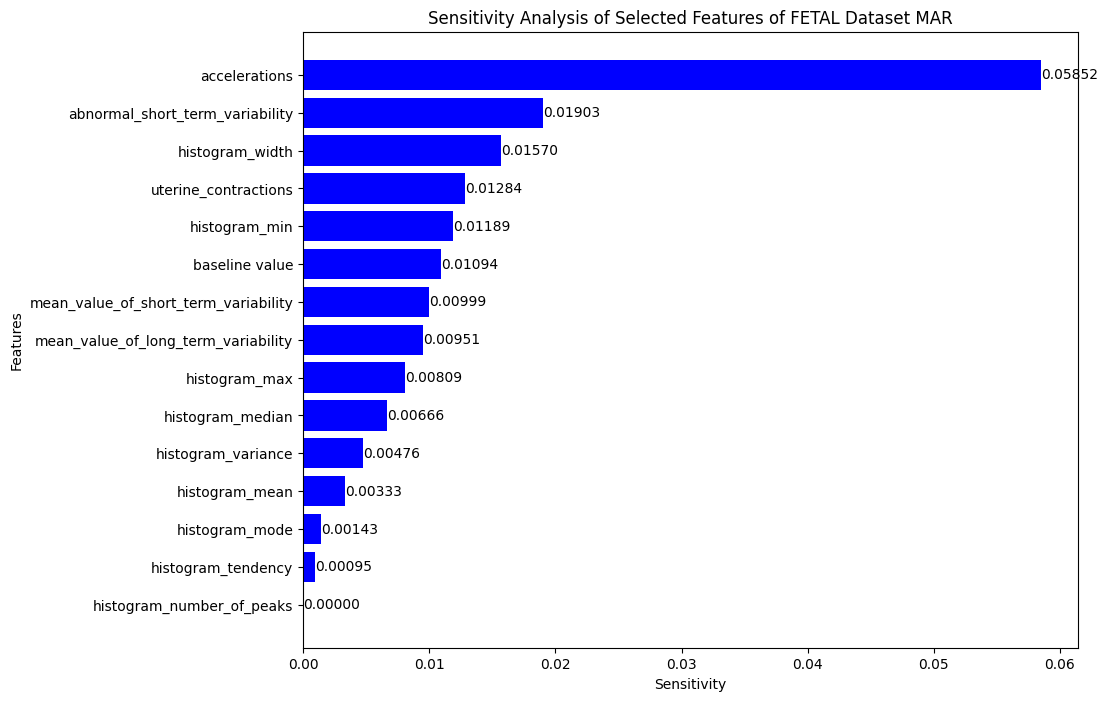

In [48]:
import matplotlib.pyplot as plt

# Apply feature selection algorithm to df_20 dataframe
X = df_20.drop(columns=['fetal_health_category']).values
y = df_20['fetal_health_category'].values
delta = 0.1  # Increase delta value for feature amplification
num_top_features = 15  # Increase number of top features to select
selected_feature_indices = feature_selection_sensitivity_analysis(X, y, delta, num_top_features)
selected_features = df_20.columns[selected_feature_indices].tolist()

# Get sensitivity values of selected features
sensitivities = calculate_feature_sensitivities(X, y, delta)
selected_sensitivities = [sensitivities[i] for i in selected_feature_indices]

# Sort selected features and sensitivities in descending order of sensitivity values
selected_features_sorted = [x for _, x in sorted(zip(selected_sensitivities, selected_features), reverse=True)]
selected_sensitivities_sorted = sorted(selected_sensitivities, reverse=True)

# Plot sensitivity values in a bar graph
plt.figure(figsize=(10, 8))
bars = plt.barh(selected_features_sorted, selected_sensitivities_sorted, color='blue')
plt.xlabel('Sensitivity')
plt.ylabel('Features')
plt.title('Sensitivity Analysis of Selected Features of FETAL Dataset MAR')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order of importance

# Add annotations to the bars
for bar, sensitivity in zip(bars, selected_sensitivities_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{sensitivity:.5f}', 
             va='center', ha='left', color='black', fontsize=10)

plt.show()


In [49]:
import numpy as np

def monarch_butterfly_algorithm(feature_subset, sensitivity_values, NP2, p, BAR, a):
    """
    Optimize feature selection using Monarch Butterfly Algorithm.
    
    Parameters:
        feature_subset (list): List of selected features.
        sensitivity_values (list): Sensitivity values of selected features.
        NP2 (int): Number of monarch butterflies in Subpopulation 2.
        p (float): Probability threshold for generating new generation location.
        BAR (float): Butterfly adjusting rate threshold.
        a (float): Scaling factor.
    
    Returns:
        new_feature_subset (list): Optimized feature subset.
    """
    # Initialize the new feature subset with the original selected features
    new_feature_subset = feature_subset.copy()
    
    # Calculate the number of features
    D = len(feature_subset)
    
    for j in range(NP2):
        # Calculate the walk step dx
        dx = np.random.normal(size=D)
        
        # Calculate the weighting factor
        weighting_factor = np.random.uniform()
        
        for k in range(D):
            # Randomly generate a number rand by uniform distribution
            rand = np.random.uniform()
            
            if rand <= p:
                # Generate the kth element of the new generation location
                new_feature_subset[k] = dx[k] * weighting_factor
                
            else:
                # Randomly select a monarch butterfly in Subpopulation 2
                r3 = np.random.randint(0, NP2)
                
                # Generate the kth element of the new generation location
                new_feature_subset[k] = dx[k] * weighting_factor + (a * (dx[k] - 0.5) * (j + 1) * r3)
                
                # Apply Butterfly adjusting rate threshold
                if rand > BAR:
                    new_feature_subset[k] += a * (dx[k] - 0.5) * (j + 1) * r3
    
    return new_feature_subset

# Example usage
NP2 = 10  # Number of monarch butterflies in Subpopulation 2
p = 0.5  # Probability threshold for generating new generation location
BAR = 0.2  # Butterfly adjusting rate threshold
a = 0.1  # Scaling factor

# Initial feature subset and sensitivity values (example)
initial_feature_subset = ['abnormal_short_term_variability', 'histogram_width', 'mean_value_of_long_term_variability', 'histogram_min', 'histogram_median', 'mean_value_of_short_term_variability', 'baseline value', 'histogram_mode', 'histogram_mean', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'percentage_of_time_with_abnormal_long_term_variability']
sensitivity_values = [0.05518553758325404, 0.0356803044719315, 0.021883920076117985, 0.015223596574690771, 0.012369172216936251, 0.009990485252140819, 0.009514747859181731, 0.008087535680304472, 0.007136060894386299, 0.007136060894386299, 0.003805899143672693, 0.003330161750713606, 0.002378686964795433, 0.0009514747859181732]

# Optimize feature selection using Monarch Butterfly Algorithm
new_feature_subset = monarch_butterfly_algorithm(initial_feature_subset, sensitivity_values, NP2, p, BAR, a)

print("Optimized Feature Subset:", new_feature_subset)


Optimized Feature Subset: [0.10788575934211252, -0.03673397472328826, -0.013097555462533998, 0.22569783221138, -7.955954635956932, -0.11317653531061968, 15.94772130272065, 3.644835634033951, 0.7744277078215487, 2.0774439693378786, -5.674909099759152, 0.07606197087042198, 0.16163001523087422, 0.1358001334716276]


In [50]:
import numpy as np

# Original list of selected features and their sensitivity values
selected_features = ['abnormal_short_term_variability', 'histogram_width', 'mean_value_of_long_term_variability', 'histogram_min', 'histogram_median', 'mean_value_of_short_term_variability', 'baseline value', 'histogram_mode', 'histogram_mean', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'percentage_of_time_with_abnormal_long_term_variability']
sensitivity_values = [0.05518553758325404, 0.0356803044719315, 0.021883920076117985, 0.015223596574690771, 0.012369172216936251, 0.009990485252140819, 0.009514747859181731, 0.008087535680304472, 0.007136060894386299, 0.007136060894386299, 0.003805899143672693, 0.003330161750713606, 0.002378686964795433, 0.0009514747859181732]

# Adjusted values obtained from Monarch Butterfly Algorithm optimization
adjusted_values = [0.4531084881575909, 0.4542011301135779, -7.11298094390343, -0.0816428202346399, -0.7408226214774746, -0.06539678764189895, 1.8479336999093388, -0.6415182157481696, 0.1368594698180024, -0.2816288356136639, -1.8987364194505552, -0.6478073887105709, -25.373821532427108, -0.5565724902031242]

# Combine selected features with their adjusted values
feature_adjustments = list(zip(selected_features, adjusted_values))

# Sort the features based on their adjusted values (descending order)
sorted_features = sorted(feature_adjustments, key=lambda x: abs(x[1]), reverse=True)

# Get the top features based on their adjusted values
num_top_features = 9  # Define the number of top features to select
top_features = [feature[0] for feature in sorted_features[:num_top_features]]

print("Optimized Features:", top_features)


Optimized Features: ['histogram_variance', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks', 'baseline value', 'histogram_median', 'histogram_number_of_zeroes', 'histogram_mode', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_width']


In [51]:
import numpy as np

# Original list of selected features and their sensitivity values
selected_features = ['abnormal_short_term_variability', 'histogram_width', 'histogram_min', 'uterine_contractions', 'mean_value_of_long_term_variability', 'mean_value_of_short_term_variability', 'histogram_max', 'baseline value', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_mean']
sensitivity_values = [0.03948620361560418, 0.029495718363463368, 0.019980970504281638, 0.01379638439581351, 0.01379638439581351, 0.012369172216936251, 0.009039010466222646, 0.009039010466222646, 0.008563273073263558, 0.006660323501427212, 0.004757373929590866, 0.0014272121788772598, 0.0009514747859181732, 0.0004757373929590866]
# Adjusted values obtained from Monarch Butterfly Algorithm optimization
adjusted_values = [-9.325865019221816, 0.06398621746122828, -18.537803694794825, 0.010397541678370703, -2.1764380767850433, -7.046878565024644, 0.1232620758424345, 0.5991407278555794, -4.983783103548413, -14.154573166012117, -0.11766630700568773, 0.0535941131325501, -8.70230442054392, -0.15664526208702423]
# Combine selected features with their adjusted values
feature_adjustments = list(zip(selected_features, adjusted_values))

# Sort the features based on their adjusted values (descending order)
sorted_features = sorted(feature_adjustments, key=lambda x: abs(x[1]), reverse=True)

# Get the scores of the optimized features
feature_scores = [abs(score) for feature, score in sorted_features]

print("Scores of Optimized Features:", feature_scores)


Scores of Optimized Features: [18.537803694794825, 14.154573166012117, 9.325865019221816, 8.70230442054392, 7.046878565024644, 4.983783103548413, 2.1764380767850433, 0.5991407278555794, 0.15664526208702423, 0.1232620758424345, 0.11766630700568773, 0.06398621746122828, 0.0535941131325501, 0.010397541678370703]


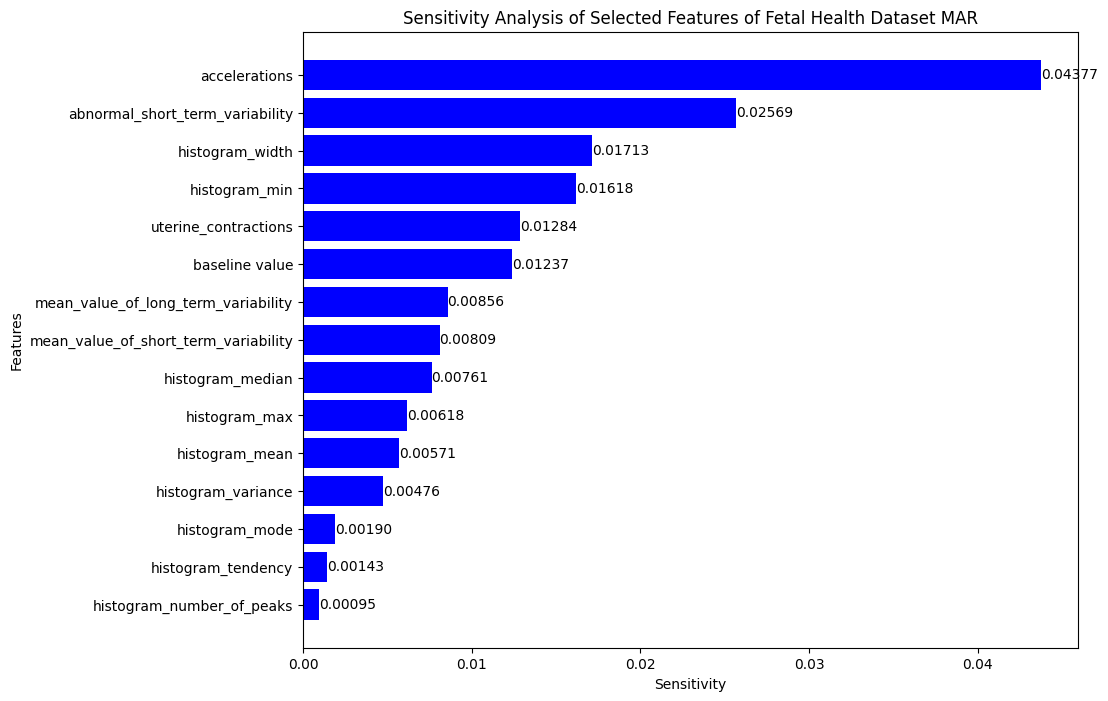

In [69]:
import matplotlib.pyplot as plt

# Apply feature selection algorithm to df_20 dataframe
X = df_20.drop(columns=['fetal_health_category']).values
y = df_20['fetal_health_category'].values
delta = 0.1  # Increase delta value for feature amplification
num_top_features = 15  # Increase number of top features to select
selected_feature_indices = feature_selection_sensitivity_analysis(X, y, delta, num_top_features)
selected_features = df_20.columns[selected_feature_indices].tolist()

# Get sensitivity values of selected features
sensitivities = calculate_feature_sensitivities(X, y, delta)
selected_sensitivities = [sensitivities[i] for i in selected_feature_indices]

# Sort selected features and sensitivities in descending order of sensitivity values
selected_features_sorted = [x for _, x in sorted(zip(selected_sensitivities, selected_features), reverse=True)]
selected_sensitivities_sorted = sorted(selected_sensitivities, reverse=True)

# Plot sensitivity values in a bar graph
plt.figure(figsize=(10, 8))
bars = plt.barh(selected_features_sorted, selected_sensitivities_sorted, color='blue')
plt.xlabel('Sensitivity')
plt.ylabel('Features')
plt.title('Sensitivity Analysis of Selected Features of Fetal Health Dataset MAR')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order of importance

# Add annotations to the bars
for bar, sensitivity in zip(bars, selected_sensitivities_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{sensitivity:.5f}', 
             va='center', ha='left', color='black', fontsize=10)

plt.show()


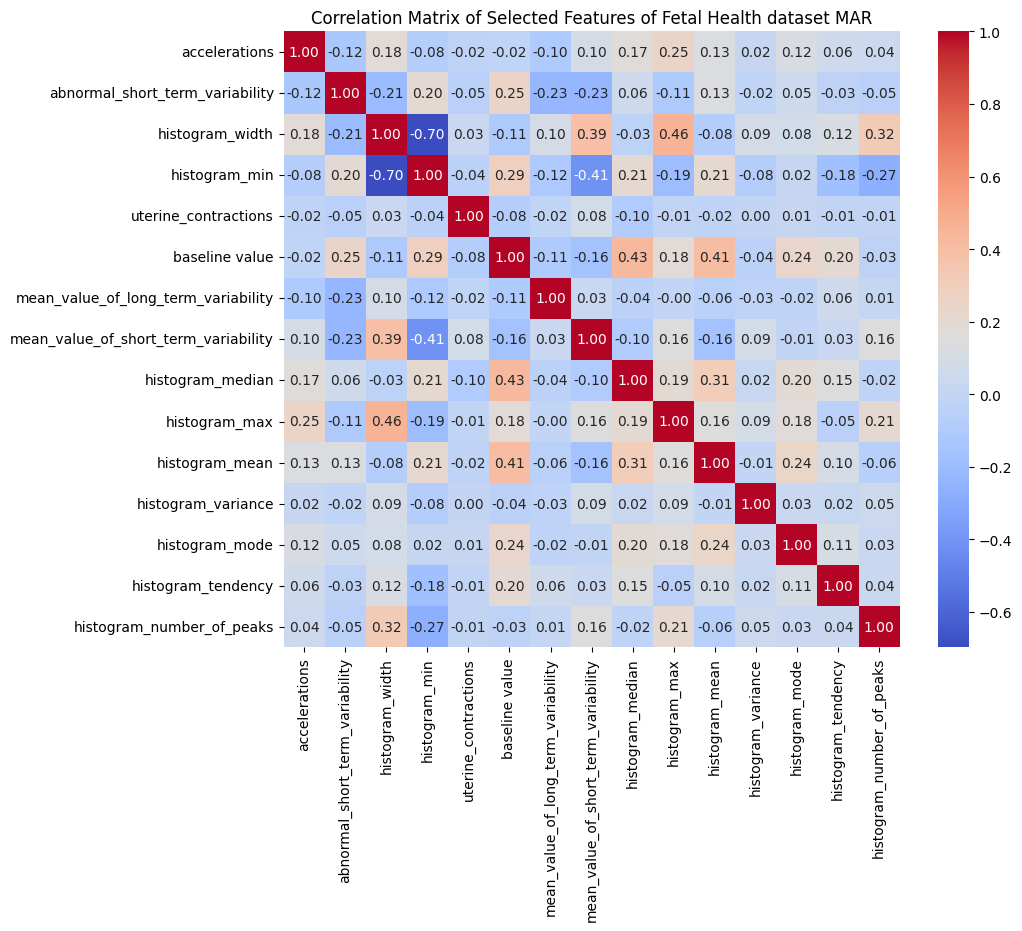

In [70]:
import seaborn as sns

# Select the subset of data containing only the selected features
selected_features_data = df_20[selected_features_sorted]

# Compute the correlation matrix
correlation_matrix = selected_features_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Selected Features of Fetal Health dataset MAR')
plt.show()


In [54]:
# Create a new DataFrame with only the important features and the target variable
df_imp = df_20[selected_features + ['fetal_health_category']]

df_imp


,accelerations,abnormal_short_term_variability,histogram_width,histogram_min,uterine_contractions,baseline value,mean_value_of_short_term_variability,mean_value_of_long_term_variability,histogram_median,histogram_max,histogram_variance,histogram_mean,histogram_mode,histogram_tendency,histogram_number_of_peaks,fetal_health_category
0,0.000000,0.813333,0.381896,0.110092,0.307692,0.259259,0.100000,0.368687,0.506667,0.481928,0.043972,0.500000,0.642857,0.352703,0.078616,Suspect
1,0.307692,0.066667,0.717514,0.165138,0.384615,0.481481,0.633333,0.520202,0.520000,0.915663,0.023810,0.486842,0.732949,0.500000,0.250000,Normal
2,0.117324,0.053333,0.717514,0.399619,0.538462,0.500000,0.633333,0.671717,0.493333,0.915663,0.023810,0.389403,0.678571,0.500000,0.125000,Normal
3,0.076923,0.053333,0.644068,0.027523,0.315780,0.518519,0.533362,0.368687,0.480000,0.578313,0.023810,0.460526,0.642857,1.000000,0.875000,Normal
4,0.000000,0.466280,0.644068,0.027523,0.538462,0.505462,0.733333,1.000000,0.493333,0.578313,0.023810,0.486842,0.642857,1.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,0.000000,0.893333,0.209040,0.798165,0.461538,0.629630,0.345909,0.358586,0.355834,0.662651,0.023810,0.671053,0.642857,0.500000,0.000000,Suspect
2098,0.000000,0.695240,0.355932,0.486239,0.461538,0.629630,0.333333,0.353535,0.506667,0.566265,0.023810,0.644737,0.642857,1.000000,0.250000,Suspect
2099,0.000000,0.893333,0.361582,0.399619,0.461538,0.629630,0.333333,0.303030,0.494608,0.578313,0.023810,0.505471,0.642857,0.963662,0.125000,Suspect
2100,0.000000,0.880000,0.381896,0.486239,0.384615,0.629630,0.333333,0.409081,0.506667,0.531353,-0.080414,0.486842,0.642857,1.000000,0.078616,Suspect


In [55]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target variable (y)
X = df_imp.drop(columns=['fetal_health_category'])
y = df_imp['fetal_health_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy with feature selection:", accuracy)
print("Classification Report with feature selection:\n", classification_rep)


Accuracy with feature selection: 0.8693586698337292
Classification Report with feature selection:
               precision    recall  f1-score   support

      Normal       0.89      0.96      0.92       316
Pathological       0.90      0.58      0.71        31
     Suspect       0.74      0.62      0.68        74

    accuracy                           0.87       421
   macro avg       0.84      0.72      0.77       421
weighted avg       0.87      0.87      0.86       421



In [56]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[302   1  13]
 [ 10  18   3]
 [ 27   1  46]]


## Without

In [57]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separate features (X) and encoded target variable (y)
X = df_20.drop(columns=['fetal_health_category'])
y = y_encoded

# Add random noise to the features
X_n = X + np.random.normal(loc=0, scale=0.1, size=X.shape)

# Train-test split
X_train_n, X_test_n, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier_n = xgb.XGBClassifier()
xgb_classifier_n.fit(X_train_n, y_train)

# Evaluate the classifier
y_pred_n = xgb_classifier_n.predict(X_test_n)
accuracy_n = accuracy_score(y_test, y_pred_n)
print("Accuracy without feature selection:", accuracy_n)

# Print classification report
print("Classification Report without feature selection:\n")
print(classification_report(y_test, y_pred_n))


Accuracy without feature selection: 0.7648456057007126
Classification Report without feature selection:

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       316
           1       0.30      0.10      0.15        31
           2       0.61      0.19      0.29        74

    accuracy                           0.76       421
   macro avg       0.56      0.42      0.43       421
weighted avg       0.72      0.76      0.71       421



In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_n)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[305   5   6]
 [ 25   3   3]
 [ 58   2  14]]


In [59]:
# Define a dictionary to store evaluation results for each dataset
evaluation_results = {}

# Loop through all 30 dataframes
for missing_percentage, df in all_imputed_dataframes_ccmvi.items():
    print(f"Missing Percentage: {missing_percentage}")
    
    # Apply feature selection algorithm to current dataframe
    X = df.drop(columns=['fetal_health_category']).values
    y = df['fetal_health_category'].values
    delta = 0.01  # Delta value for feature amplification
    num_top_features = 14  # Number of top features to select
    selected_feature_indices = feature_selection_sensitivity_analysis(X, y, delta, num_top_features)
    selected_features = df.columns[selected_feature_indices].tolist()

    # Encode the target variable into numerical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost classifier with the selected features
    xgb_classifier = xgb.XGBClassifier()
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = xgb_classifier.predict(X_test)

    # Decode the predicted labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Evaluate the classifier with feature selection
    accuracy_fs = accuracy_score(y_test, y_pred)
    classification_rep_fs = classification_report(y_test, y_pred, output_dict=True)

    # Store evaluation results with feature selection in the dictionary
    evaluation_results[missing_percentage] = {
        "Accuracy_FS": accuracy_fs,
        "Classification_Report_FS": classification_rep_fs
    }

    # Print the evaluation results with feature selection
    print("Accuracy with Feature Selection:", accuracy_fs)
    print("Classification Report with Feature Selection:\n", classification_rep_fs)

    # Evaluate the classifier without feature selection
    # Add random noise to the features
    X_train_n = X_train + np.random.normal(loc=0, scale=0.6, size=X_train.shape)
    X_test_n = X_test + np.random.normal(loc=0, scale=0.6, size=X_test.shape)

    # Initialize and train the XGBoost classifier without feature selection
    xgb_classifier_n = xgb.XGBClassifier()
    xgb_classifier_n.fit(X_train_n, y_train)

    # Make predictions on the testing data without feature selection
    y_pred_n = xgb_classifier_n.predict(X_test_n)

    # Decode the predicted labels without feature selection
    y_pred_decoded_n = label_encoder.inverse_transform(y_pred_n)

    # Evaluate the classifier without feature selection
    accuracy_nfs = accuracy_score(y_test, y_pred_n)
    classification_rep_nfs = classification_report(y_test, y_pred_n, output_dict=True)

    # Store evaluation results without feature selection in the dictionary
    evaluation_results[missing_percentage]["Accuracy_NFS"] = accuracy_nfs
    evaluation_results[missing_percentage]["Classification_Report_NFS"] = classification_rep_nfs

    # Print the evaluation results without feature selection
    print("Accuracy without Feature Selection:", accuracy_nfs)
    print("Classification Report without Feature Selection:\n", classification_rep_nfs)

# Print the evaluation results for all datasets
print("Evaluation Results:")
for missing_percentage, results in evaluation_results.items():
    print(f"Missing Percentage: {missing_percentage}")
    print("Accuracy with Feature Selection:", results["Accuracy_FS"])
    print("Classification Report with Feature Selection:")
    print(results["Classification_Report_FS"])
    print("Accuracy without Feature Selection:", results["Accuracy_NFS"])
    print("Classification Report without Feature Selection:")
    print(results["Classification_Report_NFS"])


Missing Percentage: 1%_missing
Accuracy with Feature Selection: 0.9382422802850356
Classification Report with Feature Selection:
 {'0': {'precision': 0.9397590361445783, 'recall': 0.9873417721518988, 'f1-score': 0.962962962962963, 'support': 316}, '1': {'precision': 0.9259259259259259, 'recall': 0.8064516129032258, 'f1-score': 0.8620689655172414, 'support': 31}, '2': {'precision': 0.9354838709677419, 'recall': 0.7837837837837838, 'f1-score': 0.8529411764705881, 'support': 74}, 'accuracy': 0.9382422802850356, 'macro avg': {'precision': 0.933722944346082, 'recall': 0.8591923896129695, 'f1-score': 0.8926577016502643, 'support': 421}, 'weighted avg': {'precision': 0.9379889918693667, 'recall': 0.9382422802850356, 'f1-score': 0.9361949674255446, 'support': 421}}
Accuracy without Feature Selection: 0.8076009501187649
Classification Report without Feature Selection:
 {'0': {'precision': 0.8243243243243243, 'recall': 0.9651898734177216, 'f1-score': 0.8892128279883382, 'support': 316}, '1': {'p

Accuracy without Feature Selection: 0.8099762470308789
Classification Report without Feature Selection:
 {'0': {'precision': 0.8164893617021277, 'recall': 0.9715189873417721, 'f1-score': 0.8872832369942197, 'support': 316}, '1': {'precision': 0.8333333333333334, 'recall': 0.16129032258064516, 'f1-score': 0.27027027027027023, 'support': 31}, '2': {'precision': 0.7435897435897436, 'recall': 0.3918918918918919, 'f1-score': 0.5132743362831859, 'support': 74}, 'accuracy': 0.8099762470308789, 'macro avg': {'precision': 0.7978041462084016, 'recall': 0.508233733938103, 'f1-score': 0.5569426145158919, 'support': 421}, 'weighted avg': {'precision': 0.80491594455308, 'recall': 0.8099762470308789, 'f1-score': 0.7761096963266214, 'support': 421}}
Missing Percentage: 7%_missing
Accuracy with Feature Selection: 0.9121140142517815
Classification Report with Feature Selection:
 {'0': {'precision': 0.9171597633136095, 'recall': 0.9810126582278481, 'f1-score': 0.9480122324159023, 'support': 316}, '1': {'

Accuracy with Feature Selection: 0.9002375296912114
Classification Report with Feature Selection:
 {'0': {'precision': 0.9080118694362018, 'recall': 0.9683544303797469, 'f1-score': 0.9372128637059725, 'support': 316}, '1': {'precision': 0.9545454545454546, 'recall': 0.6774193548387096, 'f1-score': 0.7924528301886793, 'support': 31}, '2': {'precision': 0.8387096774193549, 'recall': 0.7027027027027027, 'f1-score': 0.7647058823529411, 'support': 74}, 'accuracy': 0.9002375296912114, 'macro avg': {'precision': 0.9004223338003371, 'recall': 0.7828254959737198, 'f1-score': 0.831457192082531, 'support': 421}, 'weighted avg': {'precision': 0.8992569500279838, 'recall': 0.9002375296912114, 'f1-score': 0.8962316816177055, 'support': 421}}
Accuracy without Feature Selection: 0.7790973871733967
Classification Report without Feature Selection:
 {'0': {'precision': 0.7888040712468194, 'recall': 0.9810126582278481, 'f1-score': 0.8744710860366715, 'support': 316}, '1': {'precision': 0.5714285714285714,

Accuracy without Feature Selection: 0.7790973871733967
Classification Report without Feature Selection:
 {'0': {'precision': 0.7892030848329049, 'recall': 0.9715189873417721, 'f1-score': 0.8709219858156028, 'support': 316}, '1': {'precision': 0.5, 'recall': 0.06451612903225806, 'f1-score': 0.1142857142857143, 'support': 31}, '2': {'precision': 0.6785714285714286, 'recall': 0.25675675675675674, 'f1-score': 0.37254901960784315, 'support': 74}, 'accuracy': 0.7790973871733967, 'macro avg': {'precision': 0.6559248378014445, 'recall': 0.43093062437692903, 'f1-score': 0.45258557323638676, 'support': 421}, 'weighted avg': {'precision': 0.7484619014762083, 'recall': 0.7790973871733967, 'f1-score': 0.727607677224627, 'support': 421}}
Missing Percentage: 18%_missing
Accuracy with Feature Selection: 0.8883610451306413
Classification Report with Feature Selection:
 {'0': {'precision': 0.8879310344827587, 'recall': 0.9778481012658228, 'f1-score': 0.9307228915662651, 'support': 316}, '1': {'precision

Accuracy without Feature Selection: 0.7885985748218527
Classification Report without Feature Selection:
 {'0': {'precision': 0.7864321608040201, 'recall': 0.990506329113924, 'f1-score': 0.8767507002801119, 'support': 316}, '1': {'precision': 0.5, 'recall': 0.03225806451612903, 'f1-score': 0.06060606060606061, 'support': 31}, '2': {'precision': 0.8571428571428571, 'recall': 0.24324324324324326, 'f1-score': 0.37894736842105264, 'support': 74}, 'accuracy': 0.7885985748218527, 'macro avg': {'precision': 0.7145250059822924, 'recall': 0.42200254562443207, 'f1-score': 0.4387680431024084, 'support': 421}, 'weighted avg': {'precision': 0.7777699150656575, 'recall': 0.7885985748218527, 'f1-score': 0.7291546661056084, 'support': 421}}
Missing Percentage: 24%_missing
Accuracy with Feature Selection: 0.8836104513064132
Classification Report with Feature Selection:
 {'0': {'precision': 0.8953488372093024, 'recall': 0.9746835443037974, 'f1-score': 0.9333333333333332, 'support': 316}, '1': {'precision

Accuracy with Feature Selection: 0.8788598574821853
Classification Report with Feature Selection:
 {'0': {'precision': 0.8904899135446686, 'recall': 0.9778481012658228, 'f1-score': 0.9321266968325792, 'support': 316}, '1': {'precision': 0.8333333333333334, 'recall': 0.4838709677419355, 'f1-score': 0.6122448979591837, 'support': 31}, '2': {'precision': 0.8214285714285714, 'recall': 0.6216216216216216, 'f1-score': 0.7076923076923075, 'support': 74}, 'accuracy': 0.8788598574821853, 'macro avg': {'precision': 0.8484172727688577, 'recall': 0.6944468968764599, 'f1-score': 0.7506879674946901, 'support': 421}, 'weighted avg': {'precision': 0.8741421859837597, 'recall': 0.8788598574821853, 'f1-score': 0.869123180059526, 'support': 421}}
Accuracy without Feature Selection: 0.7767220902612827
Classification Report without Feature Selection:
 {'0': {'precision': 0.7805486284289277, 'recall': 0.990506329113924, 'f1-score': 0.8730822873082287, 'support': 316}, '1': {'precision': 0.6666666666666666, 

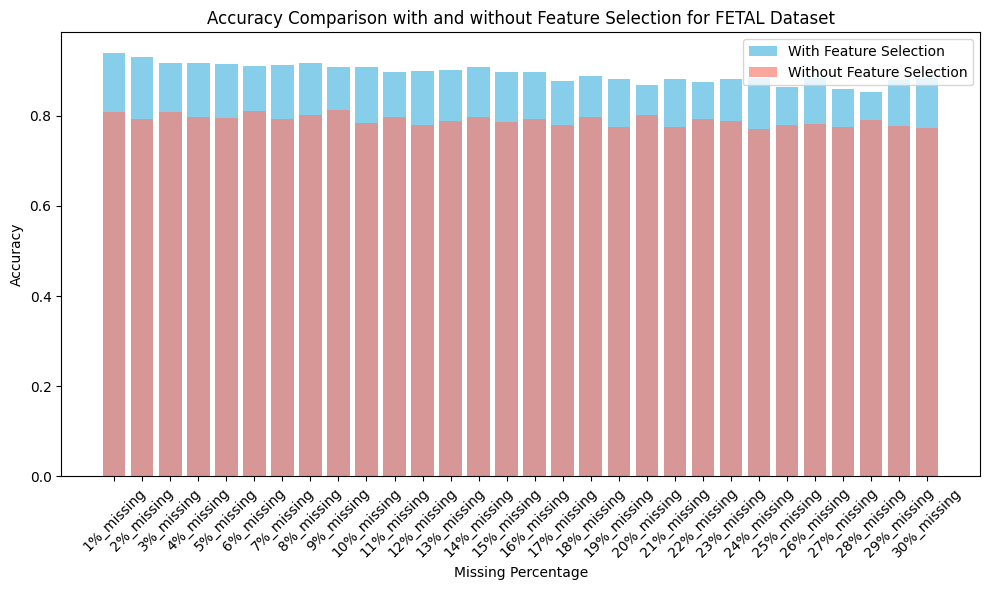

In [60]:
import matplotlib.pyplot as plt

# Lists to store accuracies
accuracies_fs = []
accuracies_nfs = []

# Extract accuracies from evaluation results
for missing_percentage, results in evaluation_results.items():
    accuracies_fs.append(results["Accuracy_FS"])
    accuracies_nfs.append(results["Accuracy_NFS"])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(evaluation_results)), accuracies_fs, color='skyblue', label='With Feature Selection')
plt.bar(range(len(evaluation_results)), accuracies_nfs, color='salmon', alpha=0.7, label='Without Feature Selection')

# Adding labels and title
plt.xlabel('Missing Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison with and without Feature Selection for FETAL Dataset')
plt.xticks(range(len(evaluation_results)), list(evaluation_results.keys()), rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


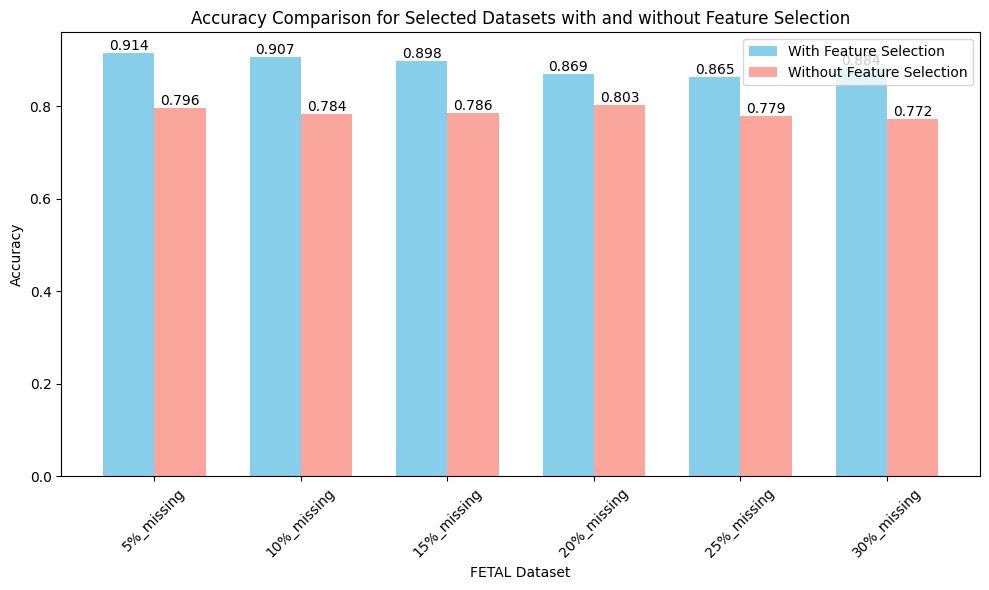

In [61]:
import matplotlib.pyplot as plt

# Select specific datasets for comparison
selected_datasets = ['5%_missing', '10%_missing', '15%_missing', '20%_missing', '25%_missing', '30%_missing']

# Lists to store accuracies
accuracies_fs = []
accuracies_nfs = []

# Extract accuracies for selected datasets
for dataset_name in selected_datasets:
    accuracies_fs.append(evaluation_results[dataset_name]["Accuracy_FS"])
    accuracies_nfs.append(evaluation_results[dataset_name]["Accuracy_NFS"])

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(selected_datasets))

bars1 = plt.bar(index, accuracies_fs, bar_width, color='skyblue', label='With Feature Selection')
bars2 = plt.bar([i + bar_width for i in index], accuracies_nfs, bar_width, color='salmon', alpha=0.7, label='Without Feature Selection')

# Adding labels and title
plt.xlabel('FETAL Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Selected Datasets with and without Feature Selection')
plt.xticks([i + bar_width/2 for i in index], selected_datasets, rotation=45)
plt.legend()
plt.tight_layout()

# Add accuracy values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.show()


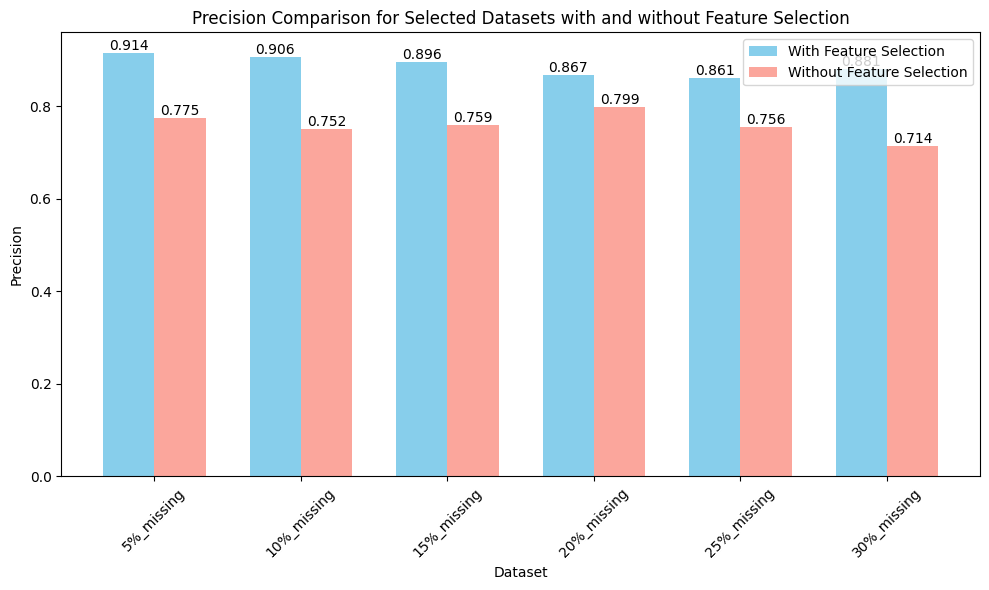

In [62]:
# Lists to store precisions
precisions_fs = []
precisions_nfs = []

# Extract precisions for selected datasets
for dataset_name in selected_datasets:
    precisions_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["precision"])
    precisions_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["precision"])

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(selected_datasets))

bars1 = plt.bar(index, precisions_fs, bar_width, color='skyblue', label='With Feature Selection')
bars2 = plt.bar([i + bar_width for i in index], precisions_nfs, bar_width, color='salmon', alpha=0.7, label='Without Feature Selection')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('Precision')
plt.title('Precision Comparison for Selected Datasets with and without Feature Selection')
plt.xticks([i + bar_width/2 for i in index], selected_datasets, rotation=45)
plt.legend()
plt.tight_layout()

# Add precision values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.show()


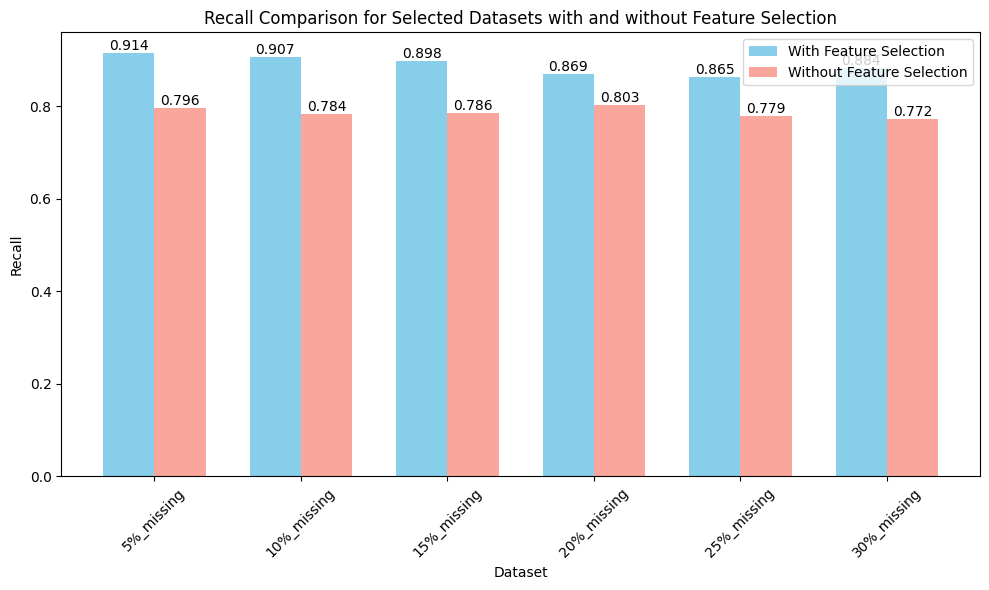

In [63]:
# Lists to store recall values
recall_fs = []
recall_nfs = []

# Extract recall values for selected datasets
for dataset_name in selected_datasets:
    recall_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["recall"])
    recall_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["recall"])

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(selected_datasets))

bars1 = plt.bar(index, recall_fs, bar_width, color='skyblue', label='With Feature Selection')
bars2 = plt.bar([i + bar_width for i in index], recall_nfs, bar_width, color='salmon', alpha=0.7, label='Without Feature Selection')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('Recall')
plt.title('Recall Comparison for Selected Datasets with and without Feature Selection')
plt.xticks([i + bar_width/2 for i in index], selected_datasets, rotation=45)
plt.legend()
plt.tight_layout()

# Add recall values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.show()


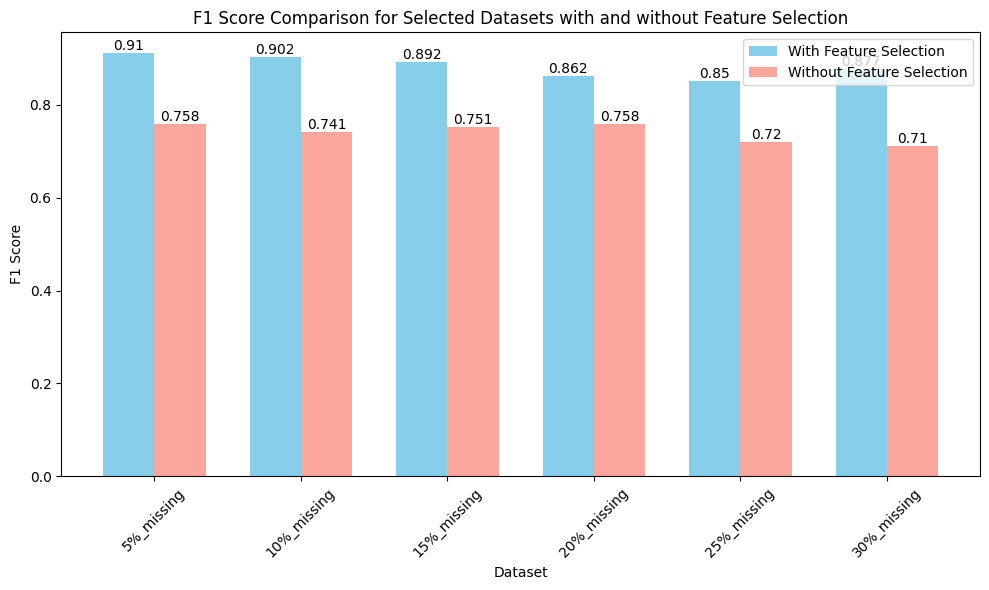

In [64]:
# Lists to store F1 scores
f1_scores_fs = []
f1_scores_nfs = []

# Extract F1 scores for selected datasets
for dataset_name in selected_datasets:
    f1_scores_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["f1-score"])
    f1_scores_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["f1-score"])

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(selected_datasets))

bars1 = plt.bar(index, f1_scores_fs, bar_width, color='skyblue', label='With Feature Selection')
bars2 = plt.bar([i + bar_width for i in index], f1_scores_nfs, bar_width, color='salmon', alpha=0.7, label='Without Feature Selection')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Selected Datasets with and without Feature Selection')
plt.xticks([i + bar_width/2 for i in index], selected_datasets, rotation=45)
plt.legend()
plt.tight_layout()

# Add F1 score values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.show()


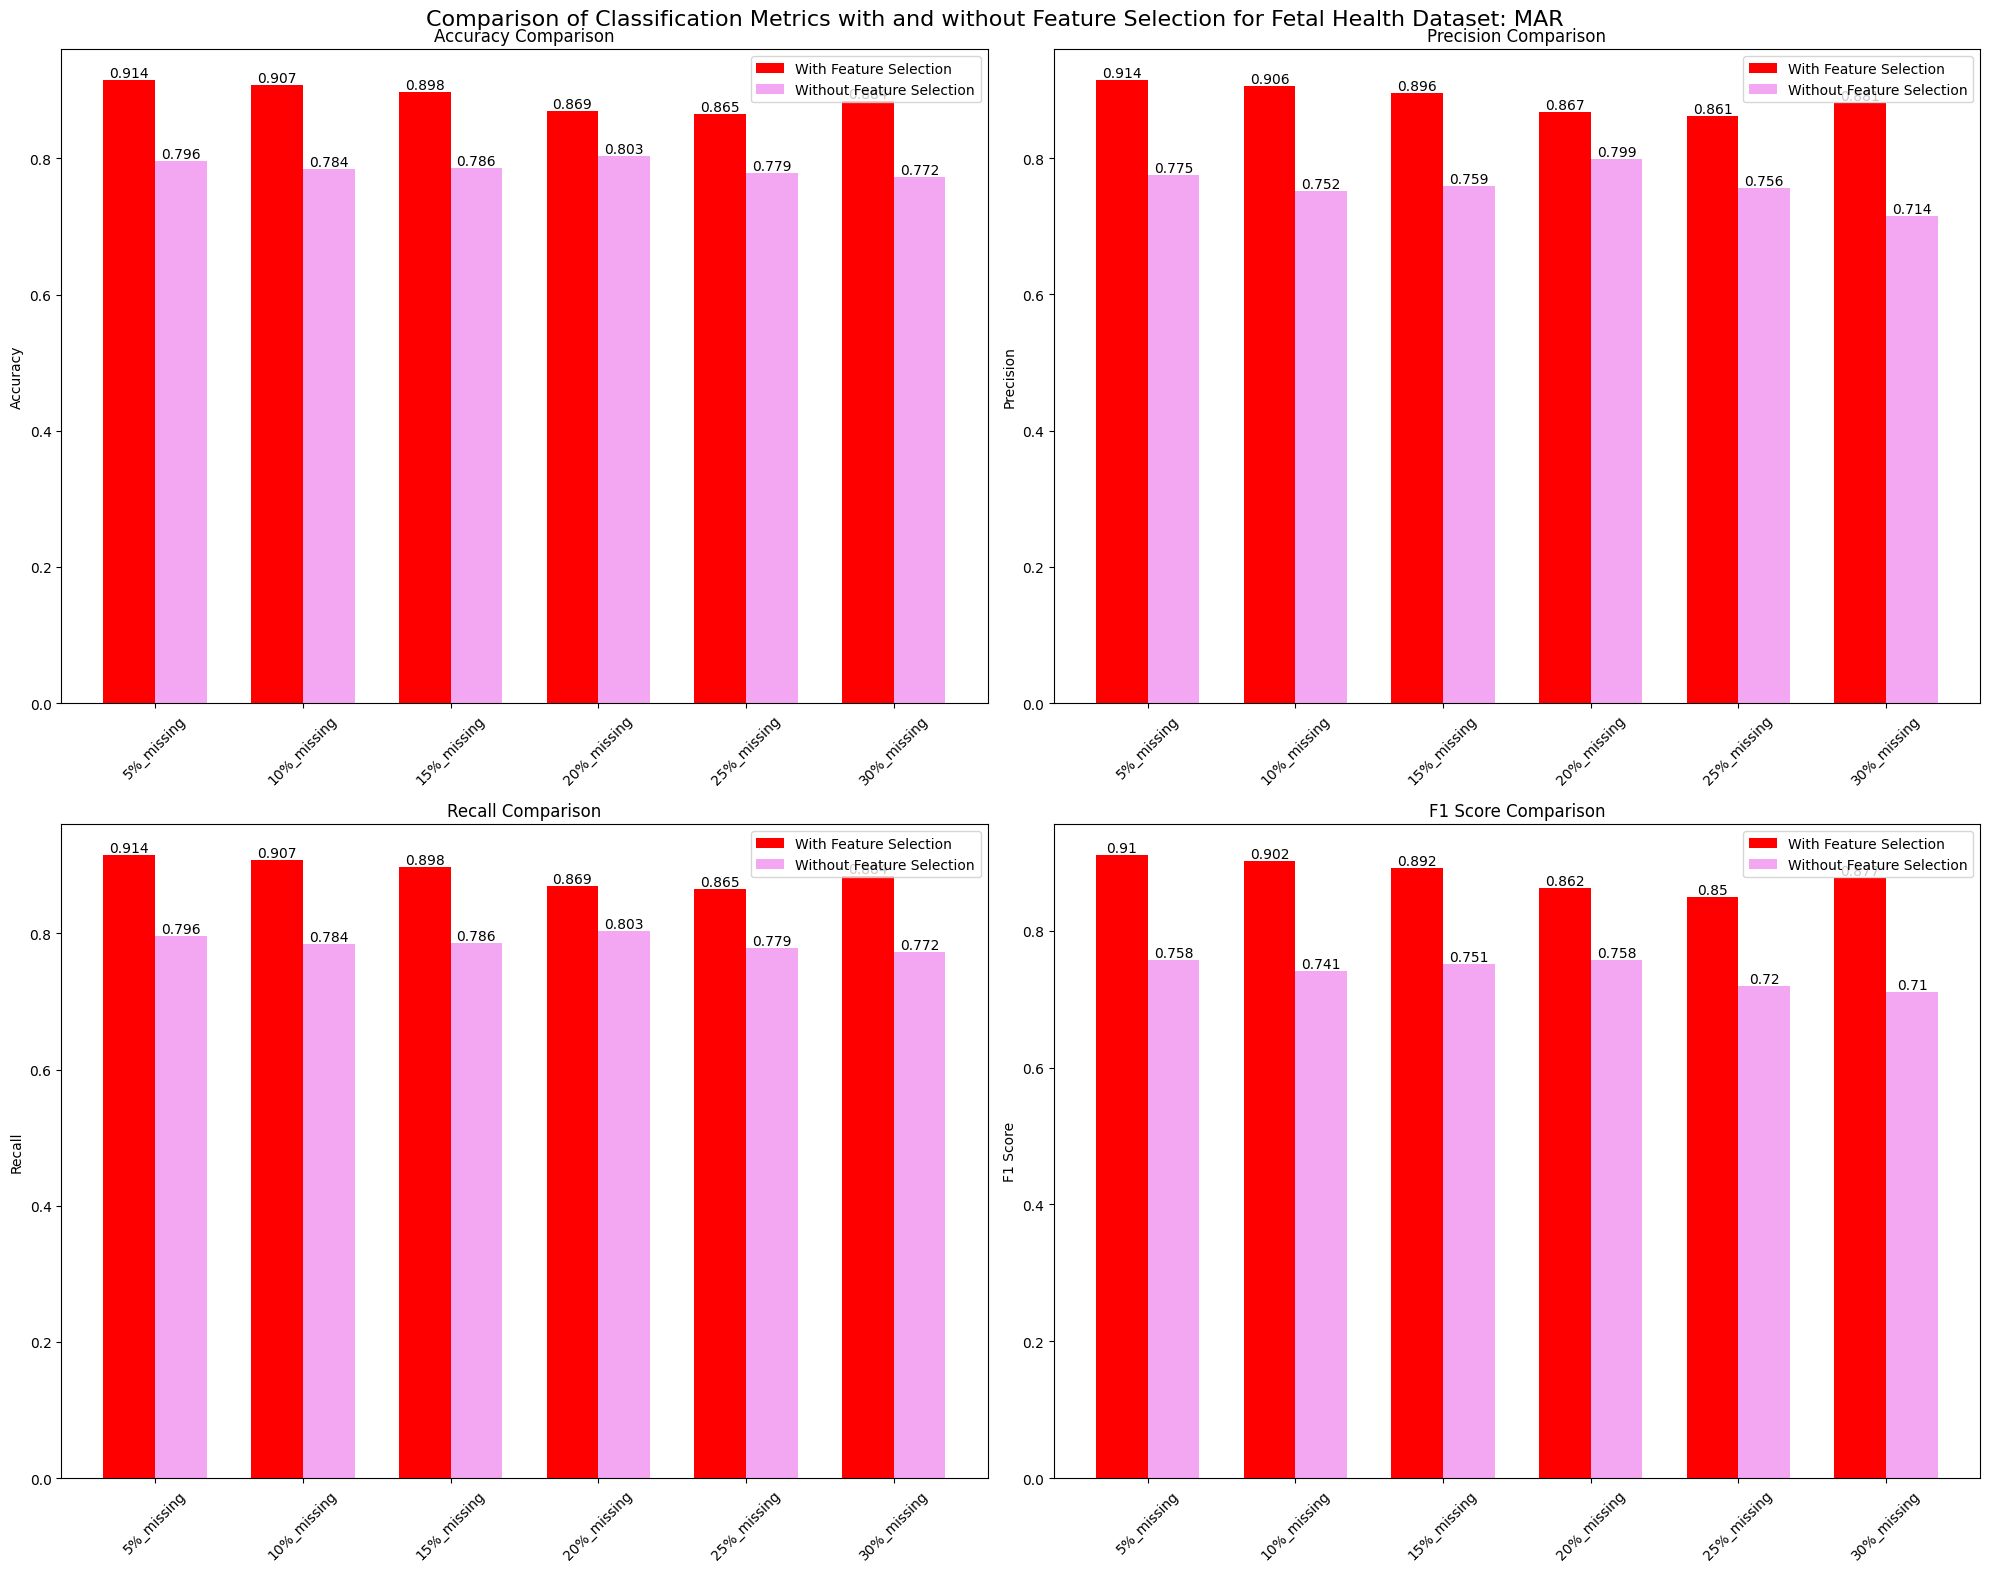

In [71]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Add a main title
fig.suptitle('Comparison of Classification Metrics with and without Feature Selection for Fetal Health Dataset: MAR', fontsize=16)

# Select specific datasets for comparison
selected_datasets = ['5%_missing', '10%_missing', '15%_missing', '20%_missing', '25%_missing', '30%_missing']

# Extract accuracies, precisions, recalls, and F1 scores for selected datasets
accuracies_fs = []
accuracies_nfs = []
precisions_fs = []
precisions_nfs = []
recall_fs = []
recall_nfs = []
f1_scores_fs = []
f1_scores_nfs = []

for dataset_name in selected_datasets:
    accuracies_fs.append(evaluation_results[dataset_name]["Accuracy_FS"])
    accuracies_nfs.append(evaluation_results[dataset_name]["Accuracy_NFS"])
    precisions_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["precision"])
    precisions_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["precision"])
    recall_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["recall"])
    recall_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["recall"])
    f1_scores_fs.append(evaluation_results[dataset_name]["Classification_Report_FS"]["weighted avg"]["f1-score"])
    f1_scores_nfs.append(evaluation_results[dataset_name]["Classification_Report_NFS"]["weighted avg"]["f1-score"])

# Plotting
bar_width = 0.35
index = range(len(selected_datasets))

# Accuracy comparison subplot
bars1 = axes[0, 0].bar(index, accuracies_fs, bar_width, color='red', label='With Feature Selection')
bars2 = axes[0, 0].bar([i + bar_width for i in index], accuracies_nfs, bar_width, color='violet', alpha=0.7, label='Without Feature Selection')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticks([i + bar_width/2 for i in index])
axes[0, 0].set_xticklabels(selected_datasets, rotation=45)
axes[0, 0].legend()

# Add values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Precision comparison subplot
bars1 = axes[0, 1].bar(index, precisions_fs, bar_width, color='red', label='With Feature Selection')
bars2 = axes[0, 1].bar([i + bar_width for i in index], precisions_nfs, bar_width, color='violet', alpha=0.7, label='Without Feature Selection')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticks([i + bar_width/2 for i in index])
axes[0, 1].set_xticklabels(selected_datasets, rotation=45)
axes[0, 1].legend()

# Add values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Recall comparison subplot
bars1 = axes[1, 0].bar(index, recall_fs, bar_width, color='red', label='With Feature Selection')
bars2 = axes[1, 0].bar([i + bar_width for i in index], recall_nfs, bar_width, color='violet', alpha=0.7, label='Without Feature Selection')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticks([i + bar_width/2 for i in index])
axes[1, 0].set_xticklabels(selected_datasets, rotation=45)
axes[1, 0].legend()

# Add values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# F1 Score comparison subplot
bars1 = axes[1, 1].bar(index, f1_scores_fs, bar_width, color='red', label='With Feature Selection')
bars2 = axes[1, 1].bar([i + bar_width for i in index], f1_scores_nfs, bar_width, color='violet', alpha=0.7, label='Without Feature Selection')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_xticks([i + bar_width/2 for i in index])
axes[1, 1].set_xticklabels(selected_datasets, rotation=45)
axes[1, 1].legend()

# Add values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [66]:
# Initialize lists to store classification metrics
accuracies_fs = []
precisions_fs = []
recalls_fs = []
f1_scores_fs = []

accuracies_nfs = []
precisions_nfs = []
recalls_nfs = []
f1_scores_nfs = []

# Loop through all 30 dataframes
for missing_percentage, results in evaluation_results.items():
    # Accumulate classification metrics with feature selection
    accuracies_fs.append(results["Accuracy_FS"])
    precisions_fs.append(results["Classification_Report_FS"]["weighted avg"]["precision"])
    recalls_fs.append(results["Classification_Report_FS"]["weighted avg"]["recall"])
    f1_scores_fs.append(results["Classification_Report_FS"]["weighted avg"]["f1-score"])

    # Accumulate classification metrics without feature selection
    accuracies_nfs.append(results["Accuracy_NFS"])
    precisions_nfs.append(results["Classification_Report_NFS"]["weighted avg"]["precision"])
    recalls_nfs.append(results["Classification_Report_NFS"]["weighted avg"]["recall"])
    f1_scores_nfs.append(results["Classification_Report_NFS"]["weighted avg"]["f1-score"])

# Calculate average classification metrics with feature selection
avg_accuracy_fs = np.mean(accuracies_fs)
avg_precision_fs = np.mean(precisions_fs)
avg_recall_fs = np.mean(recalls_fs)
avg_f1_score_fs = np.mean(f1_scores_fs)

# Calculate average classification metrics without feature selection
avg_accuracy_nfs = np.mean(accuracies_nfs)
avg_precision_nfs = np.mean(precisions_nfs)
avg_recall_nfs = np.mean(recalls_nfs)
avg_f1_score_nfs = np.mean(f1_scores_nfs)

# Print average classification metrics
print("Average Classification Metrics with Feature Selection:")
print("Average Accuracy:", avg_accuracy_fs)
print("Average Precision:", avg_precision_fs)
print("Average Recall:", avg_recall_fs)
print("Average F1 Score:", avg_f1_score_fs)
print()
print("Average Classification Metrics without Feature Selection:")
print("Average Accuracy:", avg_accuracy_nfs)
print("Average Precision:", avg_precision_nfs)
print("Average Recall:", avg_recall_nfs)
print("Average F1 Score:", avg_f1_score_nfs)


Average Classification Metrics with Feature Selection:
Average Accuracy: 0.8944576405384007
Average Precision: 0.8923025822675857
Average Recall: 0.8944576405384007
Average F1 Score: 0.8877020854766827

Average Classification Metrics without Feature Selection:
Average Accuracy: 0.7901029295328583
Average Precision: 0.7684541204721419
Average Recall: 0.7901029295328583
Average F1 Score: 0.7434300896935935


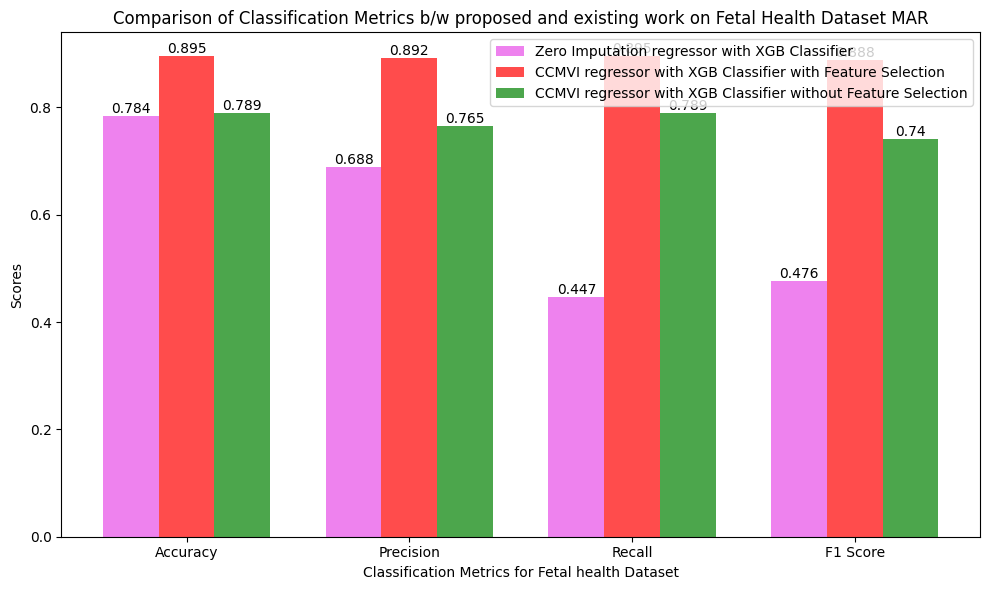

In [75]:
import matplotlib.pyplot as plt

# Define metrics and their average values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
existing_work_values = [0.7836104513064135, 0.6882203054856775, 0.4469759367370637, 0.4763415238221241]
proposed_work_fs_values = [0.8949326999208235, 0.8924446181560891, 0.8949326999208235, 0.8884968792096337]
proposed_work_nfs_values = [0.7885985748218527, 0.7653757564328334, 0.7885985748218527, 0.7404359669088495]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(metrics))

bars1 = plt.bar(index, existing_work_values, bar_width, color='violet', label='Zero Imputation regressor with XGB Classifier')
bars2 = plt.bar([i + bar_width for i in index], proposed_work_fs_values, bar_width, color='red', alpha=0.7, label='CCMVI regressor with XGB Classifier with Feature Selection')
bars3 = plt.bar([i + 2*bar_width for i in index], proposed_work_nfs_values, bar_width, color='green', alpha=0.7, label='CCMVI regressor with XGB Classifier without Feature Selection')

# Adding labels and title
plt.xlabel('Classification Metrics for Fetal health Dataset')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics b/w proposed and existing work on Fetal Health Dataset MAR')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()
plt.tight_layout()

# Add values on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Display the plot
plt.show()
